# Data Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
from catboost import CatBoostClassifier

warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('training (1).csv',parse_dates=['TransactionStartTime'])
test = pd.read_csv('test (2).csv',parse_dates=['TransactionStartTime'])

# Early  Benchmarks

In [3]:
train.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [4]:
a=train.drop(['FraudResult','CurrencyCode', 'CountryCode','TransactionId','BatchId',
              'AccountId','SubscriptionId','CustomerId','TransactionStartTime'],axis=1)
b=train['FraudResult']

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.7, random_state=42,stratify=b)

In [6]:
X_train.columns

Index(['ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount',
       'Value', 'PricingStrategy'],
      dtype='object')

In [7]:
clf_best_cb=CatBoostClassifier(iterations=2000,learning_rate=0.1,depth=5,verbose=100,
                cat_features=[0,1,2,3,6],
                     use_best_model=True,random_seed=1020,eval_metric='F1', early_stopping_rounds=100)

clf_best_cb.fit(X_train,y_train,eval_set=(X_test,y_test))

0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 1.72s	remaining: 57m 10s
100:	learn: 0.8928571	test: 0.8380282	best: 0.8380282 (14)	total: 36s	remaining: 11m 17s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.838028169
bestIteration = 14

Shrink model to first 15 iterations.


In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
cb=CatBoostClassifier(iterations=15,learning_rate=0.1,depth=5,verbose=100,cat_features=[0,1,2,3,6],
                      random_seed=1020,eval_metric='F1')

In [10]:
cv=cross_val_score(cb, a, b, scoring='f1', cv=5, n_jobs=-1, verbose=1) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished


In [11]:
print(cv.mean())
print(cv.std())

0.8111213846342367
0.13581757059710553


Text(0.5, 0, 'Importance')

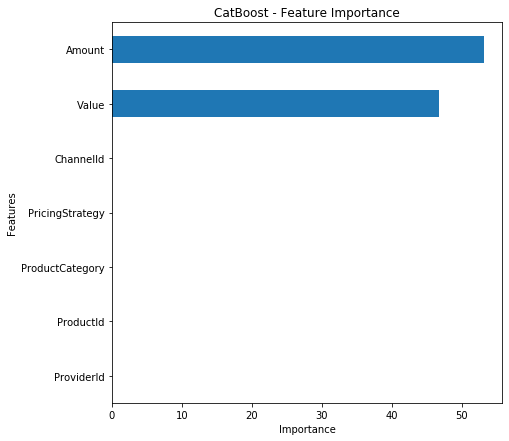

In [12]:
fea_imp = pd.DataFrame({'imp':clf_best_cb.feature_importances_, 'col': a.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False])
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(7, 7), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')

In [13]:
cb.fit(a,b)

0:	learn: 0.0000000	total: 450ms	remaining: 6.3s
14:	learn: 0.8621701	total: 7.18s	remaining: 0us


In [14]:
#pd.DataFrame(cb.predict(test[a.columns])).to_csv('Benchmark no ids.csv',index=False)

## Benchmark

In [15]:
train.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [16]:
a=train.drop(['FraudResult','CurrencyCode', 'CountryCode','TransactionId','BatchId','TransactionStartTime'],axis=1)
b=train['FraudResult']

In [17]:
a.dtypes

AccountId           object
SubscriptionId      object
CustomerId          object
ProviderId          object
ProductId           object
ProductCategory     object
ChannelId           object
Amount             float64
Value                int64
PricingStrategy      int64
dtype: object

In [18]:
clf_best_cb=CatBoostClassifier(iterations=2000,learning_rate=0.1,depth=5,verbose=100,
                     use_best_model=True,random_seed=12,eval_metric='F1', early_stopping_rounds=100)

clf_best_cb.fit(a[:50000],b[:50000],eval_set=(a[50000:],b[50000:]),
                cat_features=[0,1,2,3,4,5,6,9])

0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 223ms	remaining: 7m 24s
100:	learn: 0.9937888	test: 0.7708333	best: 0.7849462 (9)	total: 46.6s	remaining: 14m 35s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7849462366
bestIteration = 9

Shrink model to first 10 iterations.


Text(0.5, 0, 'Importance')

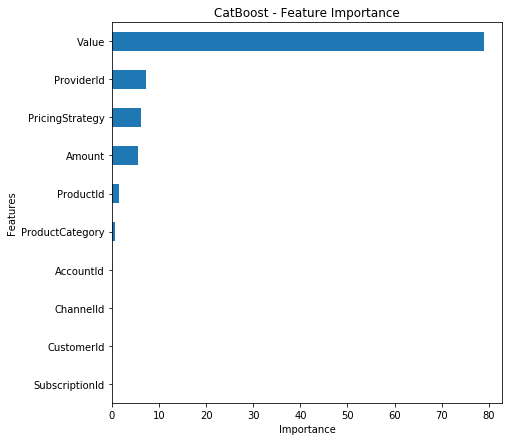

In [19]:
fea_imp = pd.DataFrame({'imp':clf_best_cb.feature_importances_, 'col': a.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False])
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(7, 7), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')

In [20]:
fs=fea_imp[fea_imp['imp']>0]['col']

In [21]:
a[fs].columns

Index(['ProductCategory', 'ProductId', 'Amount', 'PricingStrategy',
       'ProviderId', 'Value'],
      dtype='object')

In [22]:
clf_best_cb=CatBoostClassifier(iterations=2000,learning_rate=0.1,depth=5,verbose=100,
                     use_best_model=True,random_seed=12,eval_metric='F1', early_stopping_rounds=100)

clf_best_cb.fit(a[fs][:50000],b[:50000],eval_set=(a[fs][50000:],b[50000:]),
                cat_features=[0,1,3,4])

0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 315ms	remaining: 10m 29s
100:	learn: 1.0000000	test: 0.7849462	best: 0.7849462 (4)	total: 26.7s	remaining: 8m 22s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7849462366
bestIteration = 4

Shrink model to first 5 iterations.


Text(0.5, 0, 'Importance')

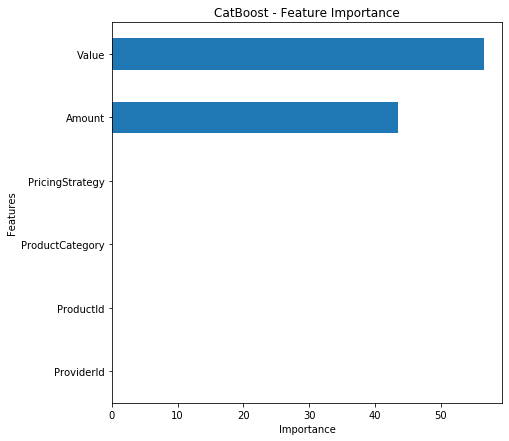

In [23]:
fea_imp = pd.DataFrame({'imp':clf_best_cb.feature_importances_, 'col': a[fs].columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False])
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(7, 7), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')

In [24]:
clf_best_cb=CatBoostClassifier(iterations=10,learning_rate=0.1,depth=5,verbose=100,random_seed=12,eval_metric='F1')

clf_best_cb.fit(a[fs],b,cat_features=[0,1,3,4])

0:	learn: 0.0000000	total: 375ms	remaining: 3.38s
9:	learn: 0.8554572	total: 4.18s	remaining: 0us


Text(0.5, 0, 'Importance')

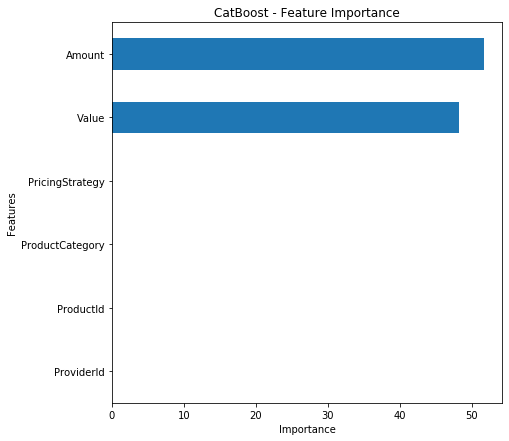

In [25]:
fea_imp = pd.DataFrame({'imp':clf_best_cb.feature_importances_, 'col': a[fs].columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False])
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(7, 7), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')

In [26]:
#pd.DataFrame(clf_best_cb.predict(test[fs])).to_csv('Xente benchmark.csv',index=False)

## Benchmark with Randominization

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=(1-(50000/a.shape[0])), random_state=42)

In [28]:
clf_best_cb=CatBoostClassifier(iterations=2000,learning_rate=0.1,depth=5,verbose=100,
                     use_best_model=True,random_seed=12,eval_metric='F1', early_stopping_rounds=100)

clf_best_cb.fit(X_train,y_train,eval_set=(X_test,y_test),
                cat_features=[0,1,2,3,4,5,6,9])

0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 480ms	remaining: 16m
100:	learn: 0.9533679	test: 0.8762887	best: 0.8808290 (76)	total: 42.1s	remaining: 13m 10s
200:	learn: 0.9740933	test: 0.8944724	best: 0.8944724 (198)	total: 1m 23s	remaining: 12m 24s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8944723618
bestIteration = 198

Shrink model to first 199 iterations.


Text(0.5, 0, 'Importance')

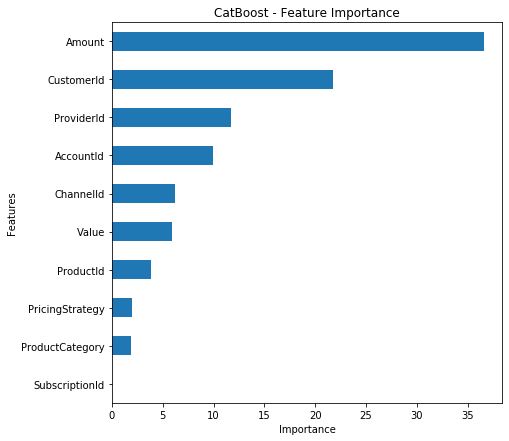

In [29]:
fea_imp = pd.DataFrame({'imp':clf_best_cb.feature_importances_, 'col': a.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False])
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(7, 7), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')

In [30]:
clf_best_cb=CatBoostClassifier(iterations=199,learning_rate=0.1,depth=5,verbose=100,random_seed=12,eval_metric='F1')

clf_best_cb.fit(a,b,cat_features=[0,1,2,3,4,5,6,9])

0:	learn: 0.0000000	total: 755ms	remaining: 2m 29s
100:	learn: 0.9442971	total: 53.5s	remaining: 51.9s
198:	learn: 0.9740933	total: 1m 47s	remaining: 0us


Text(0.5, 0, 'Importance')

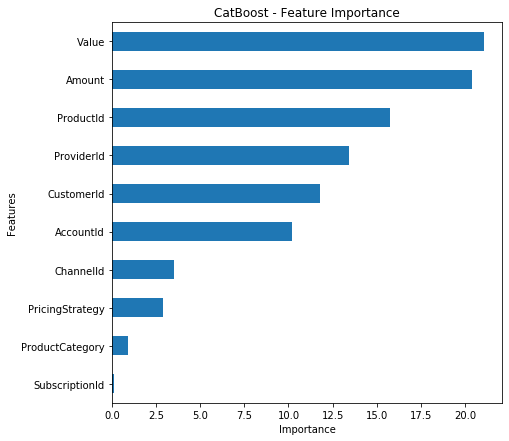

In [31]:
fea_imp = pd.DataFrame({'imp':clf_best_cb.feature_importances_, 'col': a.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False])
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(7, 7), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')

In [32]:
#pd.DataFrame(clf_best_cb.predict(test[a.columns])).to_csv('Xente benchmark randomized.csv',index=False)

## Benchmark with UnderSampling

In [33]:
from imblearn.under_sampling import RandomUnderSampler

C:\Users\ADEBAYO\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [34]:
b.mean()

0.00201752001839811

In [35]:
rus = RandomUnderSampler(random_state=42,ratio=1)
X_res, y_res = rus.fit_resample(X_train, y_train)
y_res.mean()

0.5

In [36]:
clf_best_cb=CatBoostClassifier(iterations=2000,learning_rate=0.1,depth=5,verbose=100,
                     use_best_model=True,random_seed=12,eval_metric='F1', early_stopping_rounds=100)

clf_best_cb.fit(X_res,y_res,eval_set=(X_test,y_test),
                cat_features=[0,1,2,3,4,5,6,9])

0:	learn: 0.9896907	test: 0.1213282	best: 0.1213282 (0)	total: 221ms	remaining: 7m 21s
100:	learn: 0.9948187	test: 0.2251185	best: 0.3092105 (47)	total: 16.6s	remaining: 5m 12s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.3092105263
bestIteration = 47

Shrink model to first 48 iterations.


Text(0.5, 0, 'Importance')

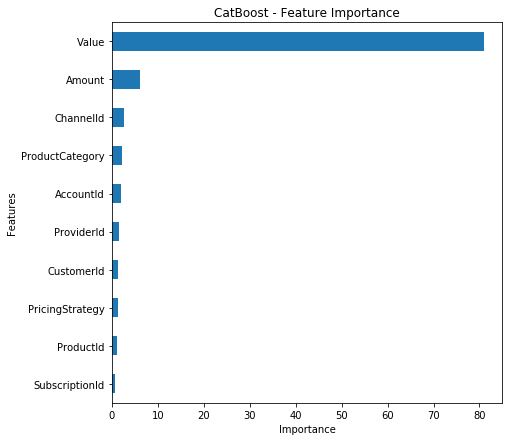

In [37]:
fea_imp = pd.DataFrame({'imp':clf_best_cb.feature_importances_, 'col': a.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False])
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(7, 7), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')

In [38]:
a_res, b_res = rus.fit_resample(a, b)

clf_best_cb=CatBoostClassifier(iterations=48,learning_rate=0.1,depth=5,verbose=100,random_seed=12,eval_metric='Accuracy')

clf_best_cb.fit(a_res,b_res,cat_features=[0,1,2,3,4,5,6,9])

0:	learn: 0.9818653	total: 108ms	remaining: 5.07s
47:	learn: 0.9948187	total: 3.53s	remaining: 0us


In [39]:
#pd.DataFrame(clf_best_cb.predict(test[a.columns])).to_csv('Xente benchmark undersample.csv',index=False)

# Data Exploration

In [40]:
train['data']= 'train'
test['data'] = 'test'

data=train.append(test)

In [41]:
data[data['data']=='train']['FraudResult'].mean()

0.00201752001839811

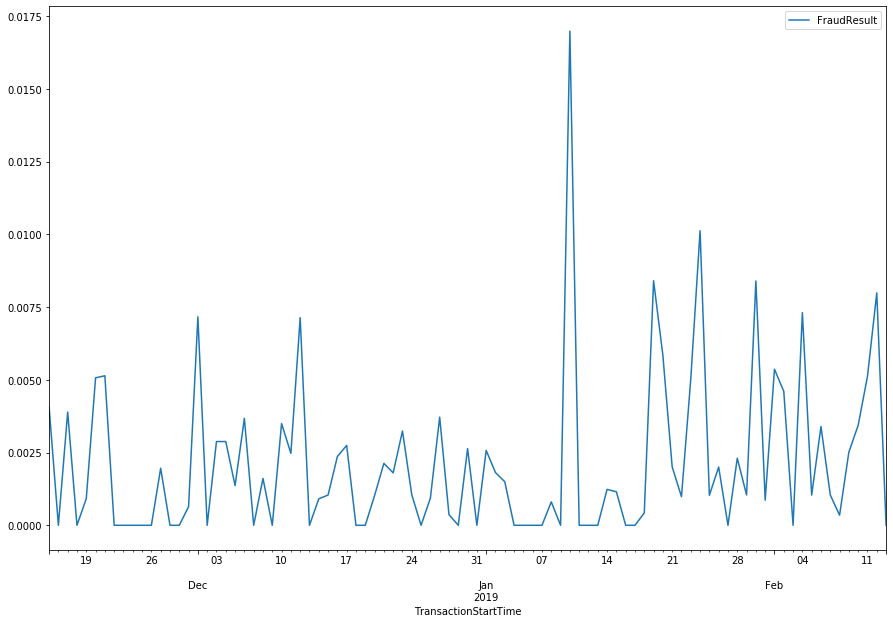

In [42]:
data[data['data']=='train'][['FraudResult','TransactionStartTime']].set_index('TransactionStartTime').resample('D').mean().plot(figsize=(15,10))

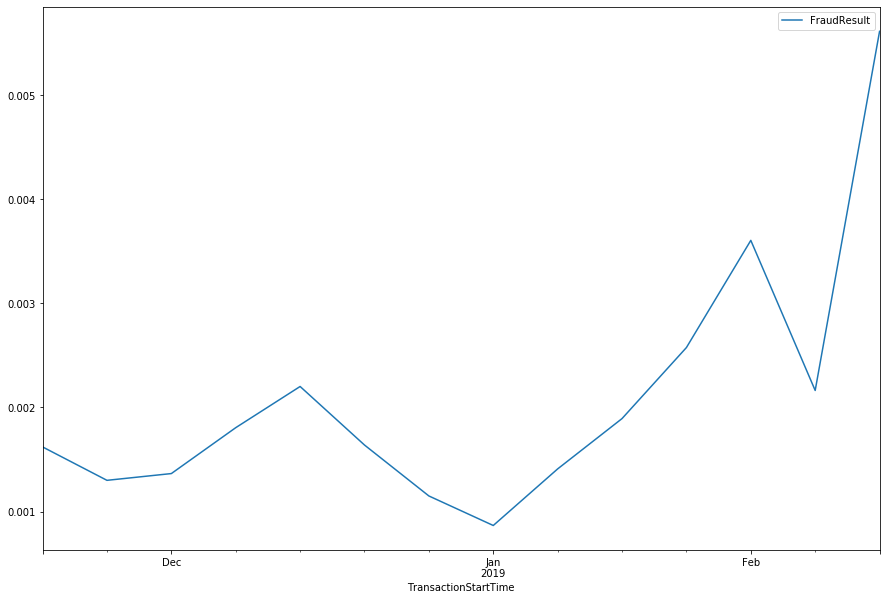

In [43]:
data[data['data']=='train'][['FraudResult','TransactionStartTime']].set_index('TransactionStartTime').resample('W').mean().plot(figsize=(15,10))

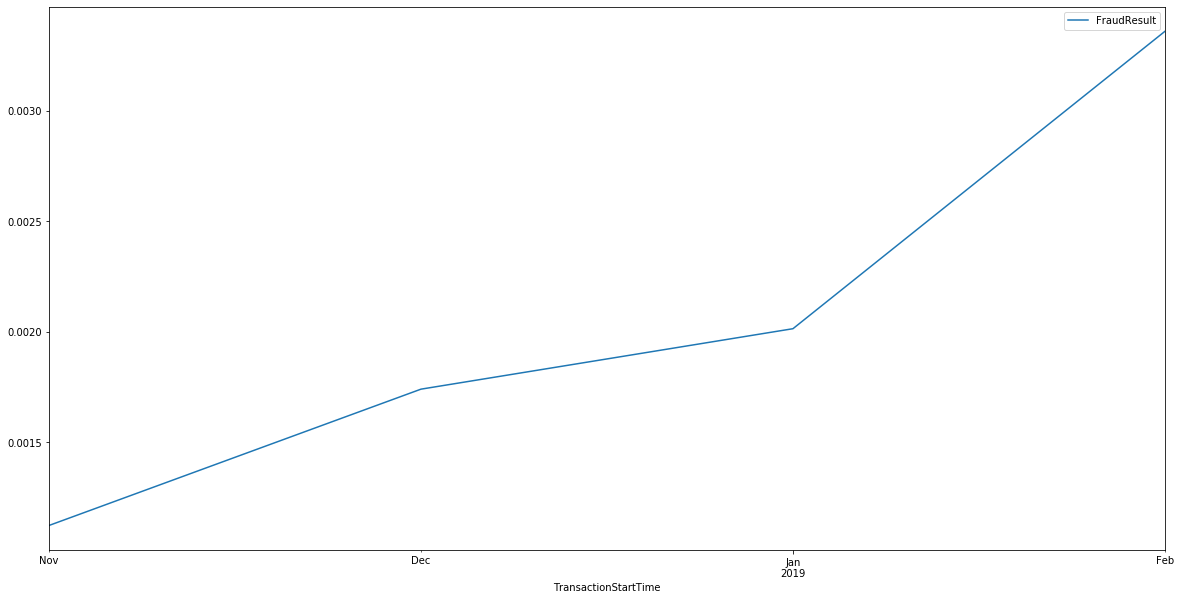

In [44]:
data[data['data']=='train'][['FraudResult','TransactionStartTime']].set_index('TransactionStartTime').resample('M').mean().plot(figsize=(20,10))

In [45]:
#data['month']=data['TransactionStartTime'].dt.month
data['quarter']=data['TransactionStartTime'].dt.quarter
data['day']=data['TransactionStartTime'].dt.day
data['week_of_month']=data['TransactionStartTime'].dt.day//7
#data['day_of_year']=data['TransactionStartTime'].dt.dayofyear
data['weekday']=data['TransactionStartTime'].dt.weekday_name
data['hour']=data['TransactionStartTime'].dt.hour
#data['week']=data['TransactionStartTime'].dt.week
#data['minute']=data['TransactionStartTime'].dt.minute
#data['seconds']=data['TransactionStartTime'].dt.second

In [46]:
data.sample(5).T

8015                       90078  \
AccountId                        AccountId_1327             AccountId_1579   
Amount                                     1000                       1000   
BatchId                           BatchId_94889              BatchId_41036   
ChannelId                           ChannelId_3                ChannelId_3   
CountryCode                                 256                        256   
CurrencyCode                                UGX                        UGX   
CustomerId                      CustomerId_1690            CustomerId_1956   
FraudResult                                   0                          0   
PricingStrategy                               4                          2   
ProductCategory                         airtime                    airtime   
ProductId                           ProductId_1                ProductId_3   
ProviderId                         ProviderId_5               ProviderId_6   
SubscriptionId              SubscriptionId_4463         SubscriptionId_821   
TransactionId               TransactionId_81013        TransactionId_49065   
TransactionStartTime  2018-11-25 09:45:04+00:00  2019-02-08 13:53:26+00:00   
Value                                      1000                       1000   
data                                      train                      train   
quarter                                       4                          1   
day                                          25                          8   
week_of_month                                 3                          1   
weekday                                  Sunday                     Friday   
hour                                          9                         13   

                                          8887                       14387  \
AccountId                        AccountId_1823             AccountId_4702   
Amount                                     1200                       1000   
BatchId                          BatchId_105419              BatchId_22999   
ChannelId                           ChannelId_3                ChannelId_3   
CountryCode                                 256                        256   
CurrencyCode                                UGX                        UGX   
CustomerId                      CustomerId_2214            CustomerId_5170   
FraudResult                                   0                          0   
PricingStrategy                               4                          2   
ProductCategory                         airtime                    airtime   
ProductId                           ProductId_1                ProductId_3   
ProviderId                         ProviderId_5               ProviderId_6   
SubscriptionId              SubscriptionId_4174        SubscriptionId_2182   
TransactionId              TransactionId_110621        TransactionId_28695   
TransactionStartTime  2018-11-26 16:02:12+00:00  2018-12-04 06:43:09+00:00   
Value                                      1200                       1000   
data                                      train                      train   
quarter                                       4                          4   
day                                          26                          4   
week_of_month                                 3                          0   
weekday                                  Monday                    Tuesday   
hour                                         16                          6   

                                          77867  
AccountId                         AccountId_476  
Amount                                     1000  
BatchId                          BatchId_121399  
ChannelId                           ChannelId_3  
CountryCode                                 256  
CurrencyCode                                UGX  
CustomerId                       CustomerId_806  
FraudResult                                   0  
Pr

In [47]:
data[data['FraudResult']==1].sample(5).T

14234                      67145  \
AccountId                        AccountId_4003             AccountId_1480   
Amount                                   500000                1.50999e+06   
BatchId                          BatchId_132582              BatchId_94007   
ChannelId                           ChannelId_3                ChannelId_3   
CountryCode                                 256                        256   
CurrencyCode                                UGX                        UGX   
CustomerId                      CustomerId_4453            CustomerId_1850   
FraudResult                                   1                          1   
PricingStrategy                               2                          2   
ProductCategory              financial_services         financial_services   
ProductId                          ProductId_15               ProductId_15   
ProviderId                         ProviderId_1               ProviderId_1   
SubscriptionId              SubscriptionId_3002        SubscriptionId_2940   
TransactionId               TransactionId_26162        TransactionId_17997   
TransactionStartTime  2018-12-03 19:37:53+00:00  2019-01-21 15:06:26+00:00   
Value                                    500000                    1509988   
data                                      train                      train   
quarter                                       4                          1   
day                                           3                         21   
week_of_month                                 0                          3   
weekday                                  Monday                     Monday   
hour                                         19                         15   

                                          131                        94733  \
AccountId                        AccountId_3832             AccountId_1909   
Amount                                   700000                     500000   
BatchId                           BatchId_93685              BatchId_61354   
ChannelId                           ChannelId_3                ChannelId_3   
CountryCode                                 256                        256   
CurrencyCode                                UGX                        UGX   
CustomerId                      CustomerId_4275            CustomerId_2303   
FraudResult                                   1                          1   
PricingStrategy                               0                          2   
ProductCategory              financial_services         financial_services   
ProductId                          ProductId_15               ProductId_15   
ProviderId                         ProviderId_3               ProviderId_3   
SubscriptionId              SubscriptionId_4161        SubscriptionId_2496   
TransactionId               TransactionId_60873         TransactionId_7273   
TransactionStartTime  2018-11-15 08:04:51+00:00  2019-02-12 12:46:25+00:00   
Value                                    700000                     500000   
data                                      train                      train   
quarter                                       4                          1   
day                                          15                         12   
week_of_month                                 2                          1   
weekday                                Thursday                    Tuesday   
hour                                          8                         12   

                                          14658  
AccountId                        AccountId_4003  
Amount                                    5e+06  
BatchId                          BatchId_116595  
ChannelId                           ChannelId_3  
CountryCode                                 256  
CurrencyCode                                UGX  
CustomerId                      CustomerId_4453  
FraudResult                                   1  
Pr

In [48]:
data.dtypes

AccountId                            object
Amount                              float64
BatchId                              object
ChannelId                            object
CountryCode                           int64
CurrencyCode                         object
CustomerId                           object
FraudResult                         float64
PricingStrategy                       int64
ProductCategory                      object
ProductId                            object
ProviderId                           object
SubscriptionId                       object
TransactionId                        object
TransactionStartTime    datetime64[ns, UTC]
Value                                 int64
data                                 object
quarter                               int64
day                                   int64
week_of_month                         int64
weekday                              object
hour                                  int64
dtype: object

In [49]:
data.groupby('AccountId').nunique().sort_values(by='CustomerId',ascending=False)

AccountId  Amount  BatchId  ChannelId  CountryCode  \
AccountId                                                            
AccountId_4841          1     508    42334          2            1   
AccountId_4840          1     127     5500          2            1   
AccountId_799           1      22     1961          1            1   
AccountId_84            1       4      295          1            1   
AccountId_10            1      47     1275          2            1   
...                   ...     ...      ...        ...          ...   
AccountId_2452          1       2        2          1            1   
AccountId_2451          1       3        6          1            1   
AccountId_2450          1       5       32          1            1   
AccountId_245           1       2        3          1            1   
AccountId_999           1       1        2          1            1   

                CurrencyCode  CustomerId  FraudResult  PricingStrategy  \
AccountId                                                                
AccountId_4841             1        3334            2                3   
AccountId_4840             1        2420            1                2   
AccountId_799              1        1961            0                2   
AccountId_84               1         290            0                1   
AccountId_10               1         218            1                2   
...                      ...         ...          ...              ...   
AccountId_2452             1           1            1                1   
AccountId_2451             1           1            0                2   
AccountId_2450             1           1            1                2   
AccountId_245              1           1            1                2   
AccountId_999              1           1            0                1   

                ProductCategory  ...  SubscriptionId  TransactionId  \
AccountId                        ...                                  
AccountId_4841                3  ...               2          42334   
AccountId_4840                1  ...               1           5500   
AccountId_799                 1  ...               1           1961   
AccountId_84                  2  ...               1            295   
AccountId_10                  5  ...               1           1315   
...                         ...  ...             ...            ...   
AccountId_2452                1  ...               1              2   
AccountId_2451                2  ...               1              6   
AccountId_2450                2  ...               1             32   
AccountId_245                 1  ...               1              3   
AccountId_999                 1  ...               1              2   

                TransactionStartTime  Value  data  quarter  day  \
AccountId                                                         
AccountId_4841                 42308    312     2        2   31   
AccountId_4840                  5493    120     2        2   31   
AccountId_799                   1815     22     1        1    2   
AccountId_84                     277      4     1        1    5   
AccountId_10                    1315     62     2        2   31   
...                              ...    ...   ...      ...  ...   
AccountId_2452                     2      2     1        1    1   
AccountId_2451                     6      3     1        1    2   
AccountId_2450                    32      5     2        2   17   
AccountId_245                      3      2     1        1    1   
AccountId_999                      2      1     1        1    1   

                week_of_month  weekday  hour  
AccountId                                     
AccountId_4841              5        7    24  
AccountId_4840              5        7    24  
AccountId_799               2        2     4  
AccountId_84                3        3     6  
AccountId_10                5        7    24  
...              

In [50]:
data[data.FraudResult==1].groupby('AccountId').nunique().describe().T

count      mean       std  min  25%  50%   75%   max
AccountId              52.0  1.000000  0.000000  1.0  1.0  1.0  1.00   1.0
Amount                 52.0  2.153846  2.371271  1.0  1.0  1.0  2.00  13.0
BatchId                52.0  3.519231  5.489707  1.0  1.0  1.0  3.00  31.0
ChannelId              52.0  1.000000  0.000000  1.0  1.0  1.0  1.00   1.0
CountryCode            52.0  1.000000  0.000000  1.0  1.0  1.0  1.00   1.0
CurrencyCode           52.0  1.000000  0.000000  1.0  1.0  1.0  1.00   1.0
CustomerId             52.0  1.057692  0.307645  1.0  1.0  1.0  1.00   3.0
FraudResult            52.0  1.000000  0.000000  1.0  1.0  1.0  1.00   1.0
PricingStrategy        52.0  1.134615  0.397485  1.0  1.0  1.0  1.00   3.0
ProductCategory        52.0  1.115385  0.322603  1.0  1.0  1.0  1.00   2.0
ProductId              52.0  1.153846  0.364321  1.0  1.0  1.0  1.00   2.0
ProviderId             52.0  1.192308  0.486623  1.0  1.0  1.0  1.00   3.0
SubscriptionId         52.0  1.000000  0.000000  1.0  1.0  1.0  1.00   1.0
TransactionId          52.0  3.711538  5.506989  1.0  1.0  1.5  4.00  31.0
TransactionStartTime   52.0  3.711538  5.506989  1.0  1.0  1.5  4.00  31.0
Value                  52.0  2.153846  2.371271  1.0  1.0  1.0  2.00  13.0
data                   52.0  1.000000  0.000000  1.0  1.0  1.0  1.00   1.0
quarter                52.0  1.076923  0.269069  1.0  1.0  1.0  1.00   2.0
day                    52.0  1.884615  1.854024  1.0  1.0  1.0  2.00  12.0
week_of_month          52.0  1.365385  0.792832  1.0  1.0  1.0  1.25   5.0
weekday                52.0  1.730769  1.330124  1.0  1.0  1.0  2.00   7.0
hour                   52.0  2.173077  2.074317  1.0  1.0  1.0  2.25  10.0

In [51]:
data[data.FraudResult==0].groupby('AccountId').nunique().describe().T

count       mean         std  min  25%  50%   75%  \
AccountId             3623.0   1.000000    0.000000  1.0  1.0  1.0   1.0   
Amount                3623.0   4.757659    9.297097  1.0  1.0  3.0   6.0   
BatchId               3623.0  26.118962  520.858353  1.0  2.0  4.0  14.0   
ChannelId             3623.0   1.008832    0.093578  1.0  1.0  1.0   1.0   
CountryCode           3623.0   1.000000    0.000000  1.0  1.0  1.0   1.0   
CurrencyCode          3623.0   1.000000    0.000000  1.0  1.0  1.0   1.0   
CustomerId            3623.0   2.266078   51.567686  1.0  1.0  1.0   1.0   
FraudResult           3623.0   1.000000    0.000000  1.0  1.0  1.0   1.0   
PricingStrategy       3623.0   1.370963    0.569185  1.0  1.0  1.0   2.0   
ProductCategory       3623.0   1.909191    1.002636  1.0  1.0  2.0   2.0   
ProductId             3623.0   2.593431    1.773954  1.0  1.0  2.0   3.0   
ProviderId            3623.0   1.879382    0.776926  1.0  1.0  2.0   2.0   
SubscriptionId        3623.0   1.000276    0.016614  1.0  1.0  1.0   1.0   
TransactionId         3623.0  26.350814  520.900596  1.0  2.0  4.0  14.0   
TransactionStartTime  3623.0  26.289815  520.495216  1.0  2.0  4.0  14.0   
Value                 3623.0   4.843224    7.743096  1.0  1.0  3.0   6.0   
data                  3623.0   1.000000    0.000000  1.0  1.0  1.0   1.0   
quarter               3623.0   1.261938    0.439750  1.0  1.0  1.0   2.0   
day                   3623.0   4.938449    6.315059  1.0  1.0  2.0   6.0   
week_of_month         3623.0   2.208115    1.477895  1.0  1.0  1.0   3.0   
weekday               3623.0   2.722882    2.175600  1.0  1.0  2.0   4.0   
hour                  3623.0   4.771736    4.998681  1.0  1.0  2.0   7.0   

                          max  
AccountId                 1.0  
Amount                  435.0  
BatchId               30892.0  
ChannelId                 2.0  
CountryCode               1.0  
CurrencyCode              1.0  
CustomerId             2577.0  
FraudResult               1.0  
PricingStrategy           4.0  
ProductCategory           8.0  
ProductId                13.0  
ProviderId                4.0  
SubscriptionId            2.0  
TransactionId         30892.0  
TransactionStartTime  30868.0  
Value                   279.0  
data                      1.0  
quarter                   2.0  
day                      31.0  
week_of_month             5.0  
weekday                   7.0  
hour                     24.0

In [52]:
data.nunique()

AccountId                 4841
Amount                    2099
BatchId                 139493
ChannelId                    5
CountryCode                  1
CurrencyCode                 1
CustomerId                7479
FraudResult                  2
PricingStrategy              4
ProductCategory             10
ProductId                   27
ProviderId                   6
SubscriptionId            4836
TransactionId           140681
TransactionStartTime    138574
Value                     1880
data                         2
quarter                      2
day                         31
week_of_month                5
weekday                      7
hour                        24
dtype: int64

In [53]:
data.drop(['CountryCode','CurrencyCode'],inplace=True,axis=1)

for col in ['AccountId','BatchId','CustomerId','SubscriptionId','TransactionId']:
    data[col+'Num']=(data[col].str.split("_", n = 1, expand = True))[1]

In [54]:
data.isnull().sum()

AccountId                   0
Amount                      0
BatchId                     0
ChannelId                   0
CustomerId                  0
FraudResult             45019
PricingStrategy             0
ProductCategory             0
ProductId                   0
ProviderId                  0
SubscriptionId              0
TransactionId               0
TransactionStartTime        0
Value                       0
data                        0
quarter                     0
day                         0
week_of_month               0
weekday                     0
hour                        0
dtype: int64

In [55]:
num_col = ['Amount', 'Value','day','week_of_month','hour']
cat_col = [col for col in data.columns if col not in num_col] + ['day','hour','week of month']

In [56]:
data.describe()/100

Amount  FraudResult  PricingStrategy         Value      quarter  \
count   1406.810000   956.620000      1406.810000   1406.810000  1406.810000   
mean      60.505776     0.000020         0.022575    100.285081     0.020259   
std     1153.133592     0.000449         0.007351   1150.625856     0.014231   
min   -25000.000000     0.000000         0.000000      0.020000     0.010000   
25%       -0.500000     0.000000         0.020000      3.920000     0.010000   
50%       10.000000     0.000000         0.020000     10.000000     0.010000   
75%       30.000000     0.000000         0.020000     50.000000     0.040000   
max    98800.000000     0.010000         0.040000  98800.000000     0.040000   

               day  week_of_month         hour  
count  1406.810000    1406.810000  1406.810000  
mean      0.151544       0.017904     0.124460  
std       0.086992       0.012717     0.049057  
min       0.010000       0.000000     0.000000  
25%       0.080000       0.010000     0.080000  
50%       0.150000       0.020000     0.130000  
75%       0.220000       0.030000     0.170000  
max       0.310000       0.040000     0.230000

In [57]:
from scipy.stats import ks_2samp

print(np.round(ks_2samp(train.Amount, test.Amount),4))
print(np.round(ks_2samp(train.Value, test.Value),4))

[0.0445 0.    ]
[0.0654 0.    ]


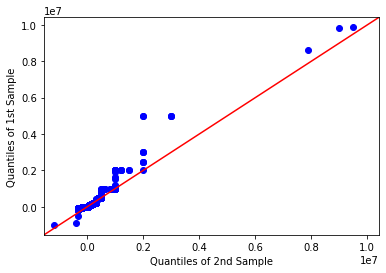

In [58]:
>>> import statsmodels.api as sm
>>> from statsmodels.graphics.gofplots import qqplot_2samples
>>> pp_x = sm.ProbPlot(train.sample(40000).Amount)
>>> pp_y = sm.ProbPlot(test.sample(40000).Amount)
>>> qqplot_2samples(pp_x, pp_y,line='45')
>>> plt.show()

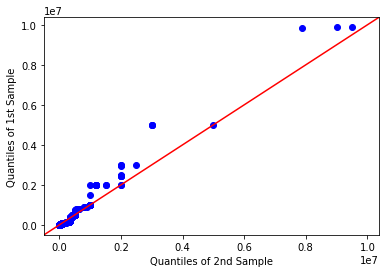

In [59]:
>>> import statsmodels.api as sm
>>> from statsmodels.graphics.gofplots import qqplot_2samples
>>> pp_x = sm.ProbPlot(train.sample(40000).Value)
>>> pp_y = sm.ProbPlot(test.sample(40000).Value)
>>> qqplot_2samples(pp_x, pp_y,line='45')
>>> plt.show()

In [60]:
data.columns

Index(['AccountId', 'Amount', 'BatchId', 'ChannelId', 'CustomerId',
       'FraudResult', 'PricingStrategy', 'ProductCategory', 'ProductId',
       'ProviderId', 'SubscriptionId', 'TransactionId', 'TransactionStartTime',
       'Value', 'data', 'quarter', 'day', 'week_of_month', 'weekday', 'hour'],
      dtype='object')

## Ayaba

In [61]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def cramers_v(x, y):
    """
    Calculates Cramer's V statistic for categorical-categorical association.
    Uses correction from Bergsma and Wicher, Journal of the Korean Statistical Society 42 (2013): 323-328.
    This is a symmetric coefficient: V(x,y) = V(y,x)
    Original function taken from: https://stackoverflow.com/a/46498792/5863503
    Wikipedia: https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
    **Returns:** float in the range of [0,1]
    Parameters
    ----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


def theils_u(x, y):
    """
    Calculates Theil's U statistic (Uncertainty coefficient) for categorical-categorical association.
    This is the uncertainty of x given y: value is on the range of [0,1] - where 0 means y provides no information about
    x, and 1 means y provides full information about x.
    This is an asymmetric coefficient: U(x,y) != U(y,x)
    Wikipedia: https://en.wikipedia.org/wiki/Uncertainty_coefficient
    **Returns:** float in the range of [0,1]
    Parameters
    ----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    """
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [62]:
data.columns

Index(['AccountId', 'Amount', 'BatchId', 'ChannelId', 'CustomerId',
       'FraudResult', 'PricingStrategy', 'ProductCategory', 'ProductId',
       'ProviderId', 'SubscriptionId', 'TransactionId', 'TransactionStartTime',
       'Value', 'data', 'quarter', 'day', 'week_of_month', 'weekday', 'hour'],
      dtype='object')

In [63]:
r=[]
for x in ['AccountId','ChannelId', 'CustomerId','FraudResult', 'PricingStrategy', 'ProductCategory', 'ProductId',
         'ProviderId', 'SubscriptionId','quarter', 'day', 'week_of_month', 'weekday', 'hour']:
    print(x)
    c=['AccountId','ChannelId', 'CustomerId','FraudResult', 'PricingStrategy', 'ProductCategory', 'ProductId',
         'ProviderId', 'SubscriptionId','quarter', 'day', 'week_of_month', 'weekday', 'hour']
    for y in c:
        if x!=y:
            o=cramers_v(data[x],data[y])
            r.append([x,y,o])
    c.remove(x)
    

AccountId
ChannelId
CustomerId
FraudResult
PricingStrategy
ProductCategory
ProductId
ProviderId
SubscriptionId
quarter
day
week_of_month
weekday
hour


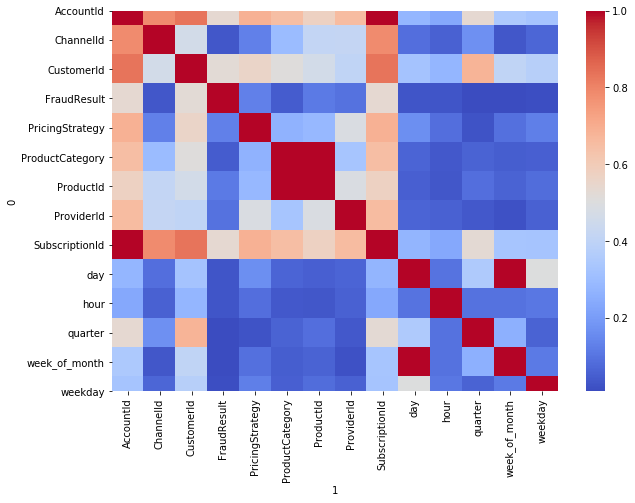

In [64]:
plt.figure(figsize=(10,7))
sns.heatmap(pd.pivot_table(data=pd.DataFrame(r).sort_values(by=2,ascending=False),
                                                            index=0,columns=1,values=2).fillna(1),cmap='coolwarm')

<Figure size 720x504 with 0 Axes>

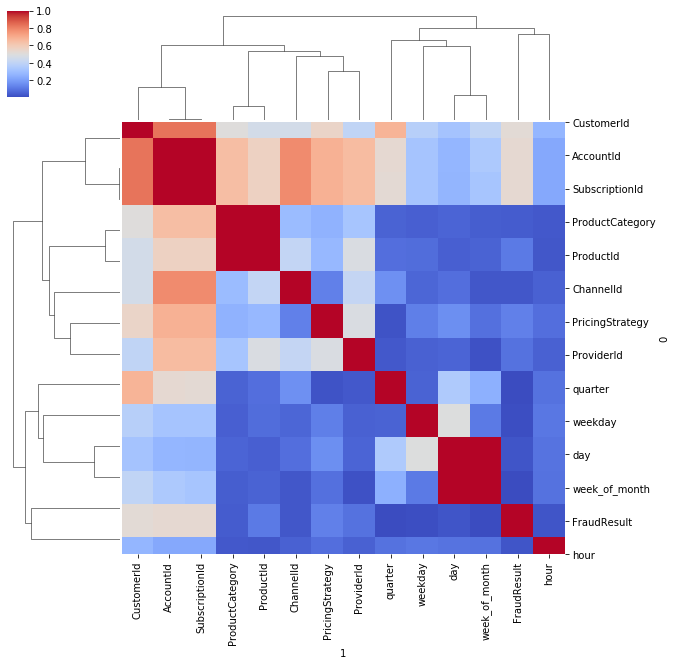

In [65]:
plt.figure(figsize=(10,7))
sns.clustermap(pd.pivot_table(data=pd.DataFrame(r),
                index=0,columns=1,values=2).fillna(1),cmap='coolwarm')

# Univariate EDA

## Numerical Columns

In [66]:
num_col

['Amount', 'Value', 'day', 'week_of_month', 'hour']

In [67]:
data[num_col]=data[num_col].astype('float64')

In [68]:
data[['Amount_log','Value_log']]=np.log(data[['Amount','Value']])
num_col = num_col + ['Amount_log','Value_log']

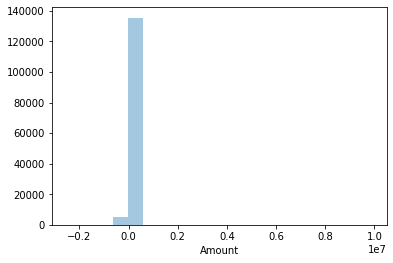

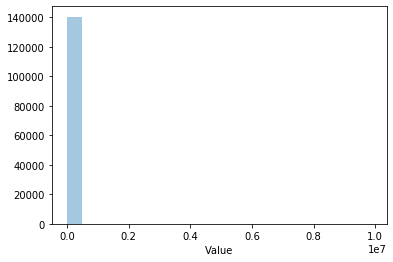

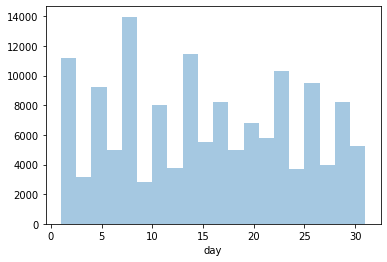

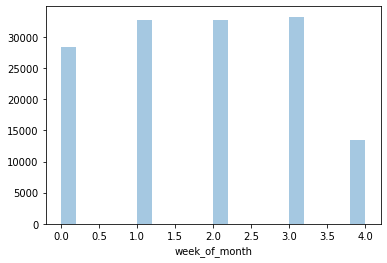

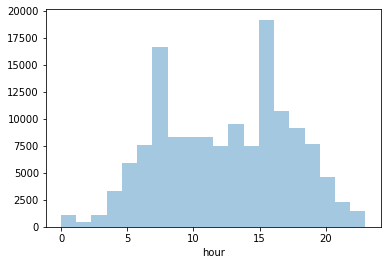

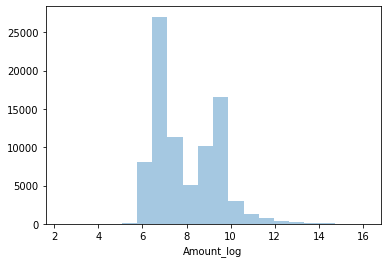

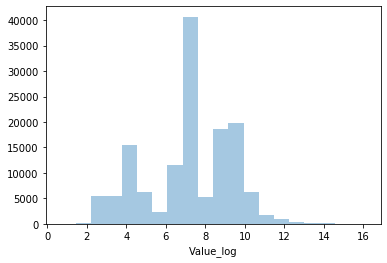

In [69]:
for col in num_col:
    sns.distplot(data[col].dropna(),kde=False,bins=20)
    plt.show()

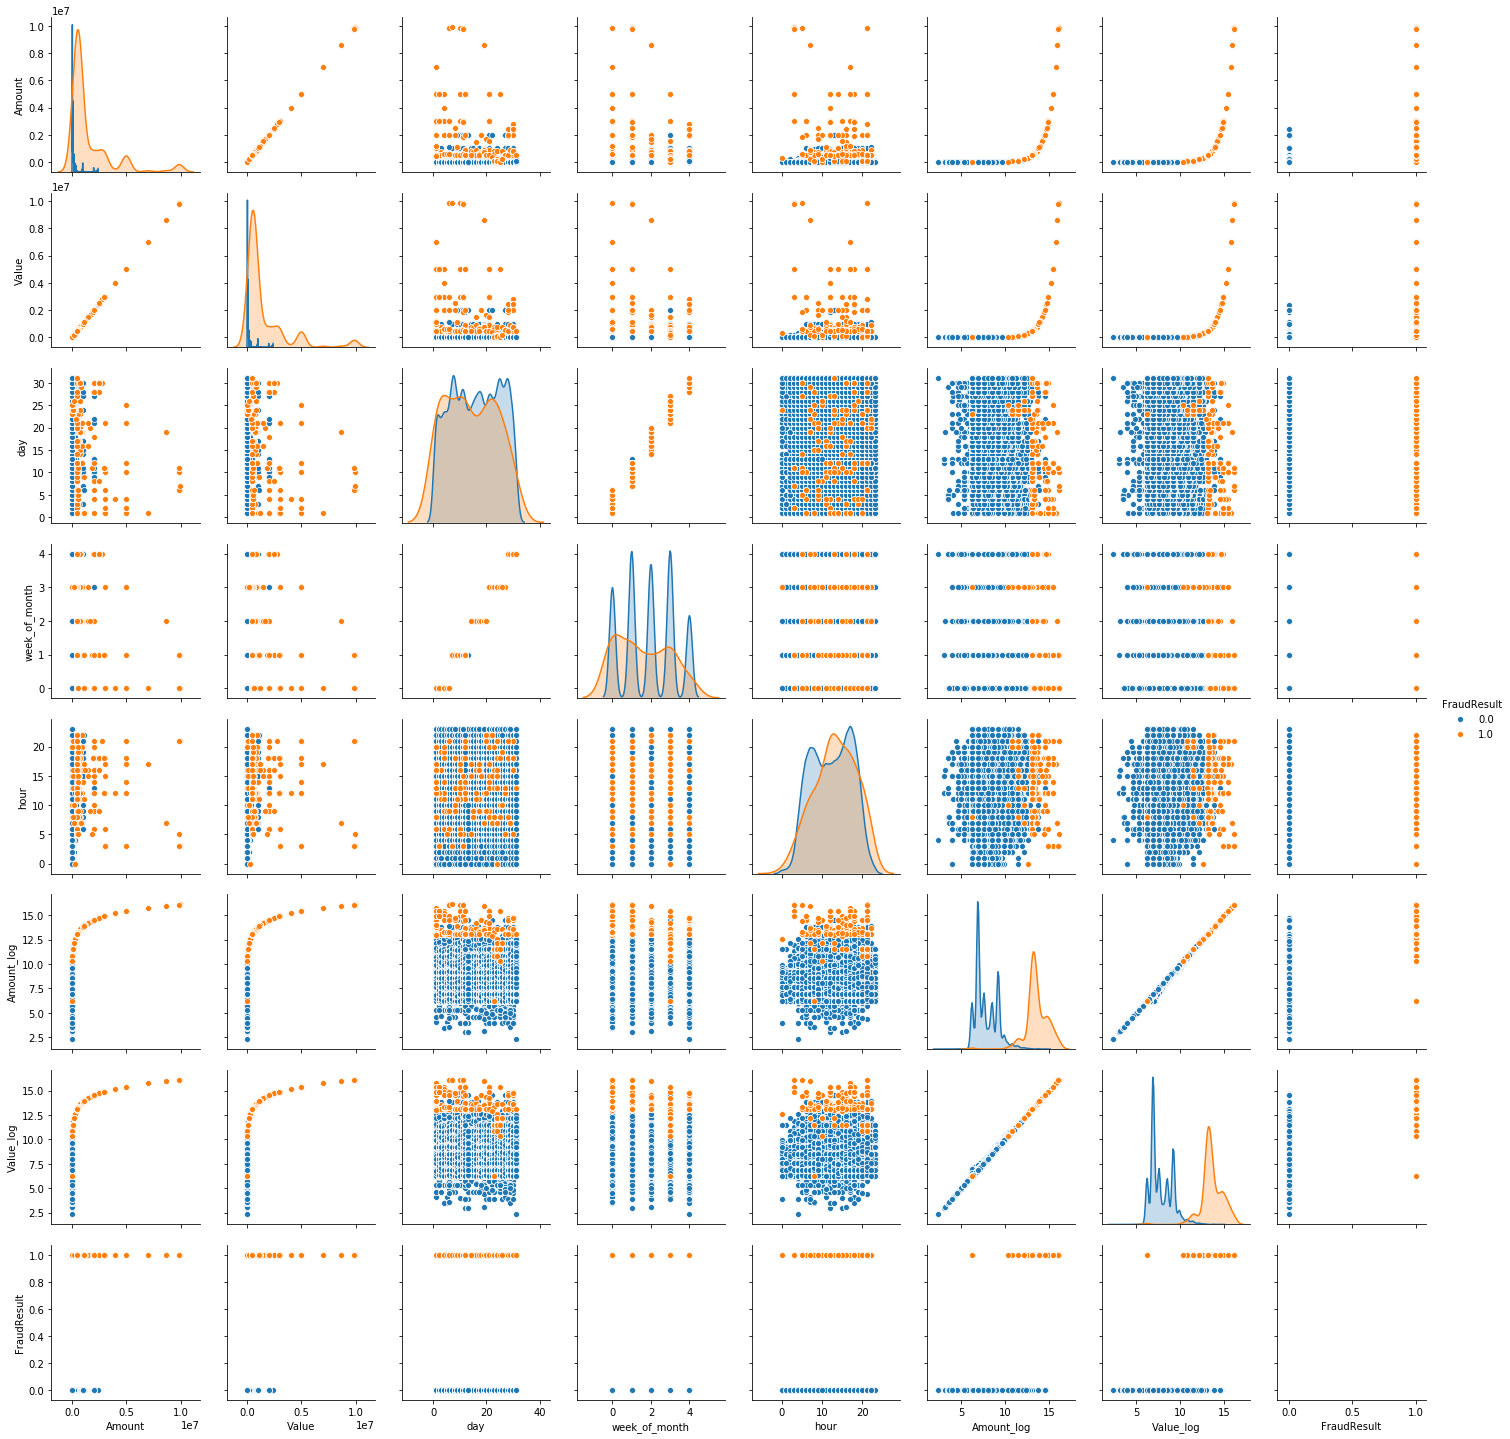

In [70]:
c=num_col + ['FraudResult']
sns.pairplot(data[c].dropna(),diag_kind='kde',hue='FraudResult')

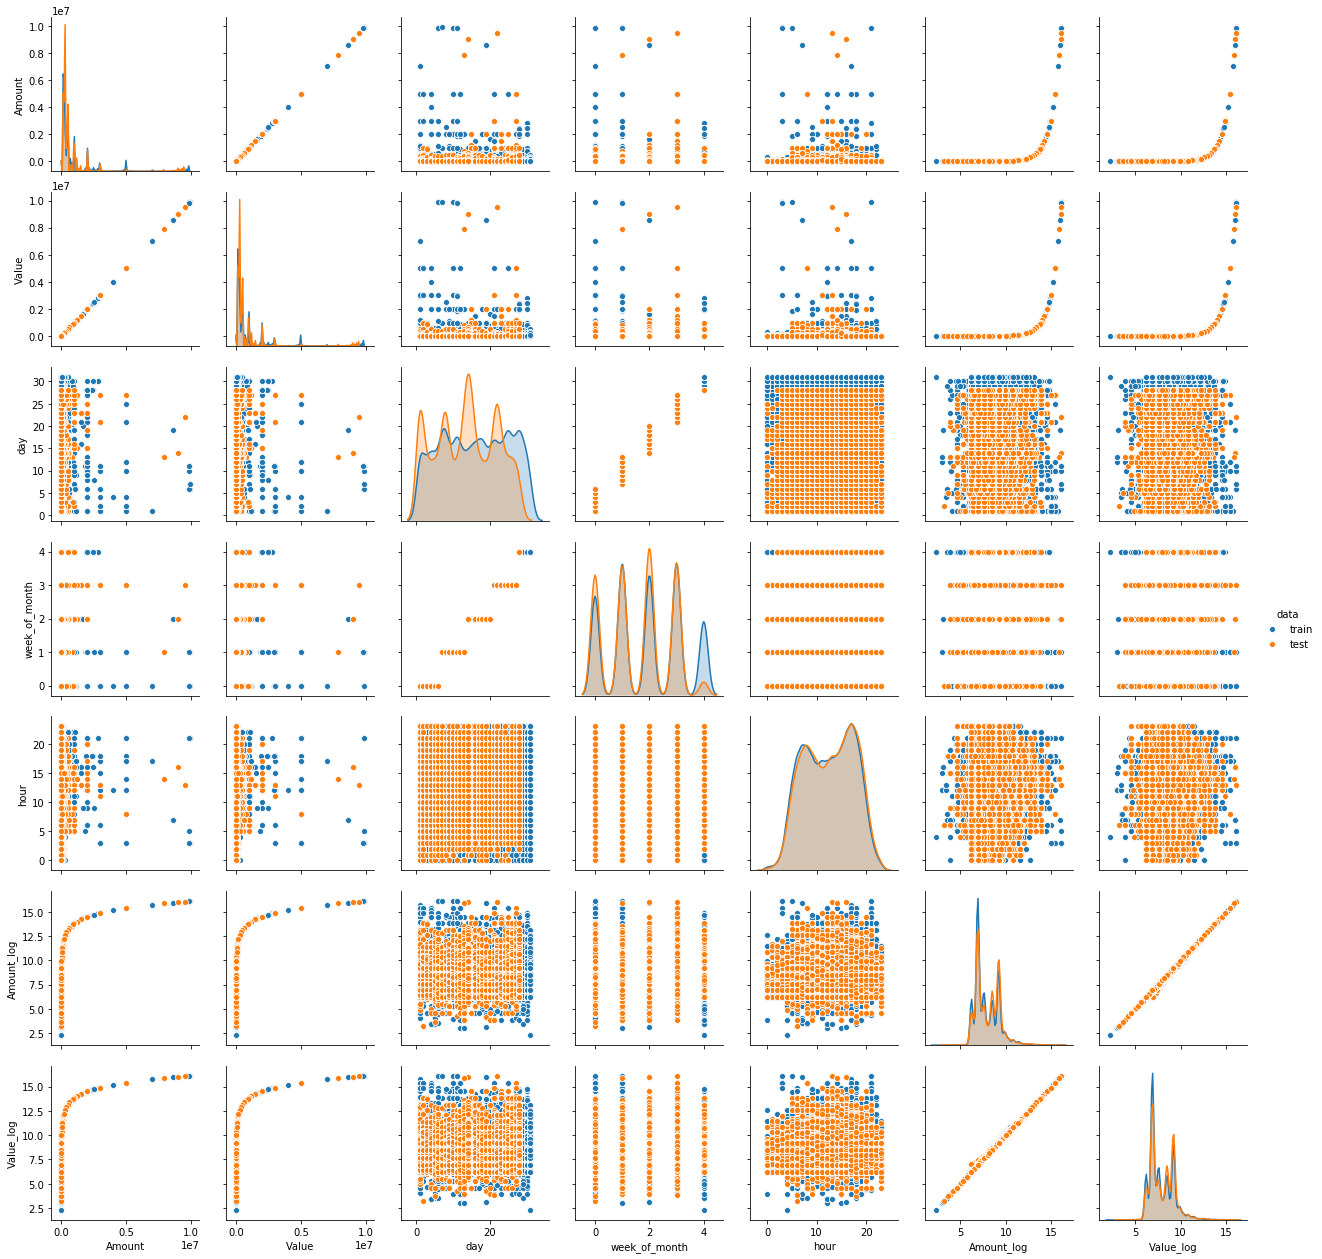

In [71]:
d=num_col + ['data']
sns.pairplot(data[d].dropna(),diag_kind='kde',hue='data')

In [72]:
data['is credit']=data['Amount_log'].isnull()

In [73]:
data.head()

AccountId   Amount         BatchId    ChannelId       CustomerId  \
0  AccountId_3957   1000.0   BatchId_36123  ChannelId_3  CustomerId_4406   
1  AccountId_4841    -20.0   BatchId_15642  ChannelId_2  CustomerId_4406   
2  AccountId_4229    500.0   BatchId_53941  ChannelId_3  CustomerId_4683   
3   AccountId_648  20000.0  BatchId_102363  ChannelId_3   CustomerId_988   
4  AccountId_4841   -644.0   BatchId_38780  ChannelId_2   CustomerId_988   

   FraudResult  PricingStrategy     ProductCategory     ProductId  \
0          0.0                2             airtime  ProductId_10   
1          0.0                2  financial_services   ProductId_6   
2          0.0                2             airtime   ProductId_1   
3          0.0                2        utility_bill  ProductId_21   
4          0.0                2  financial_services   ProductId_6   

     ProviderId  ...    Value   data quarter   day week_of_month   weekday  \
0  ProviderId_6  ...   1000.0  train       4  15.0           2.0  Thursday   
1  ProviderId_4  ...     20.0  train       4  15.0           2.0  Thursday   
2  ProviderId_6  ...    500.0  train       4  15.0           2.0  Thursday   
3  ProviderId_1  ...  21800.0  train       4  15.0           2.0  Thursday   
4  ProviderId_4  ...    644.0  train       4  15.0           2.0  Thursday   

   hour  Amount_log Value_log  is credit  
0   2.0    6.907755  6.907755      False  
1   2.0         NaN  2.995732       True  
2   2.0    6.214608  6.214608      False  
3   3.0    9.903488  9.989665      False  
4   3.0         NaN  6.467699       True  

[5 rows x 23 columns]

## Categorical Features

In [74]:
cat_col = cat_col + ['is credit']

In [75]:
cat_col

['AccountId',
 'BatchId',
 'ChannelId',
 'CustomerId',
 'FraudResult',
 'PricingStrategy',
 'ProductCategory',
 'ProductId',
 'ProviderId',
 'SubscriptionId',
 'TransactionId',
 'TransactionStartTime',
 'data',
 'quarter',
 'weekday',
 'day',
 'hour',
 'week of month',
 'is credit']

In [76]:
set(list(data.columns))-set(cat_col + num_col)

set()

In [77]:
data.nunique().sort_values()#

is credit                    2
quarter                      2
data                         2
FraudResult                  2
PricingStrategy              4
week_of_month                5
ChannelId                    5
ProviderId                   6
weekday                      7
ProductCategory             10
hour                        24
ProductId                   27
day                         31
Amount_log                1508
Value_log                 1880
Value                     1880
Amount                    2099
SubscriptionId            4836
AccountId                 4841
CustomerId                7479
TransactionStartTime    138574
BatchId                 139493
TransactionId           140681
dtype: int64

In [78]:
cat_col.remove('week of month')
cat_col = cat_col + ['week_of_month']

In [79]:
cat_co = [col for col in cat_col if data[col].nunique()<100]

ChannelId


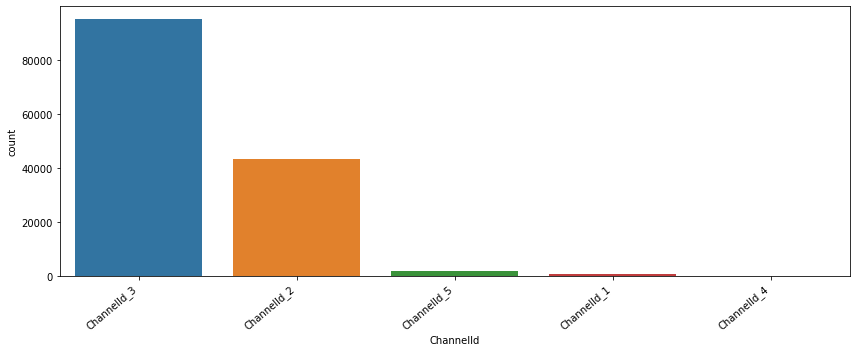

FraudResult


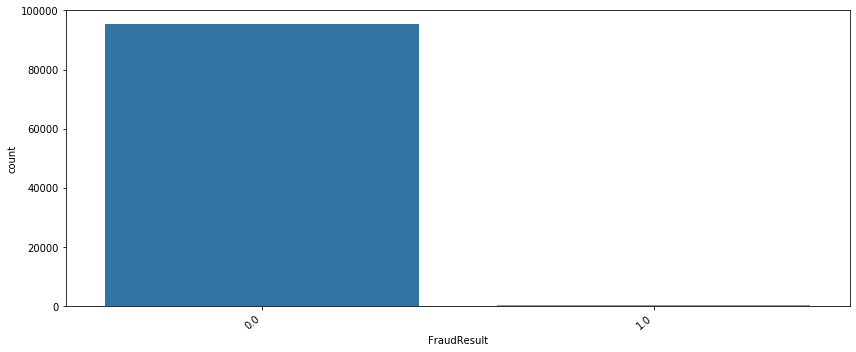

PricingStrategy


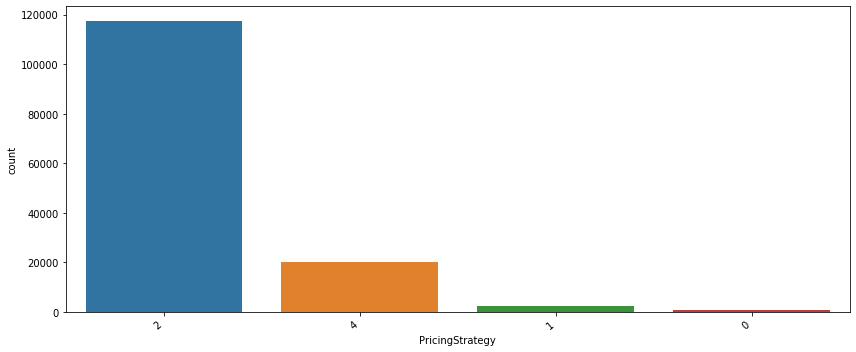

ProductCategory


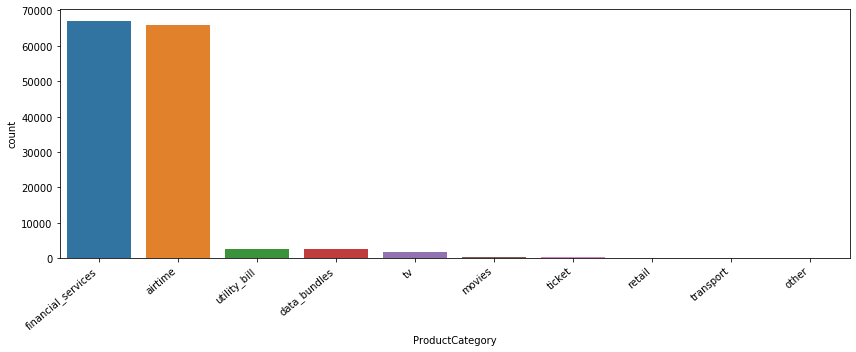

ProductId


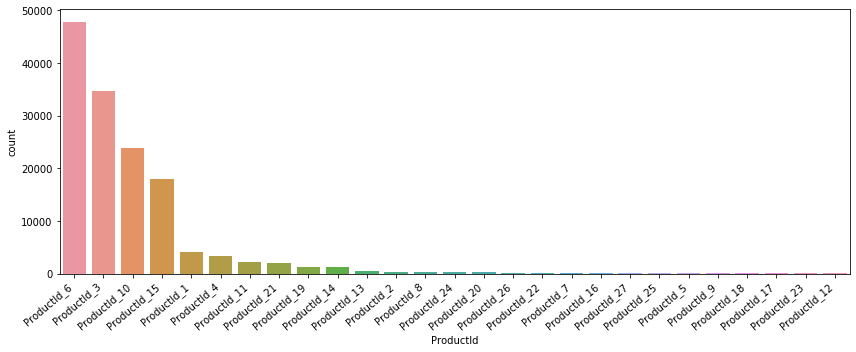

ProviderId


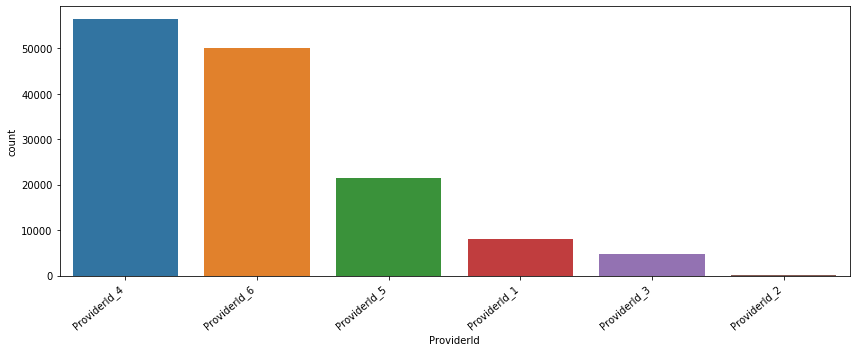

data


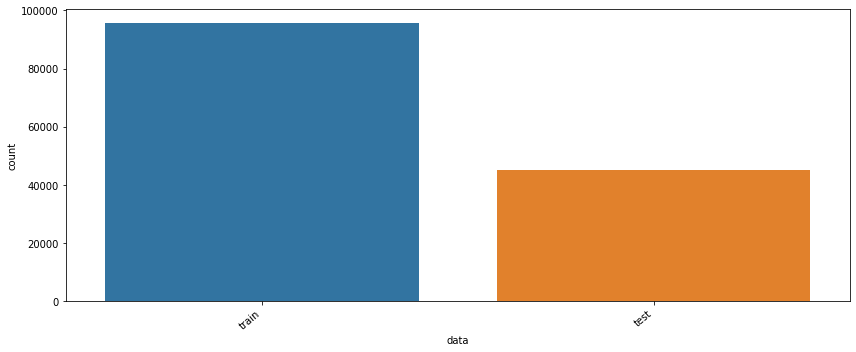

quarter


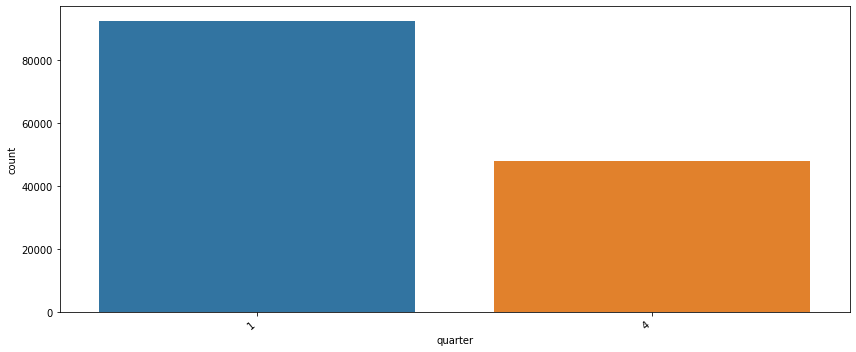

weekday


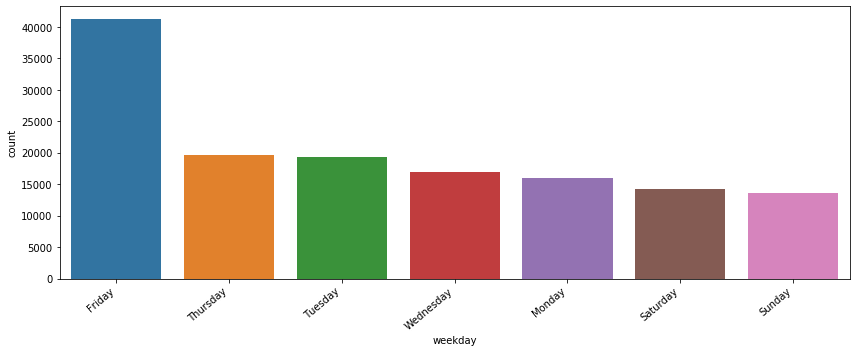

day


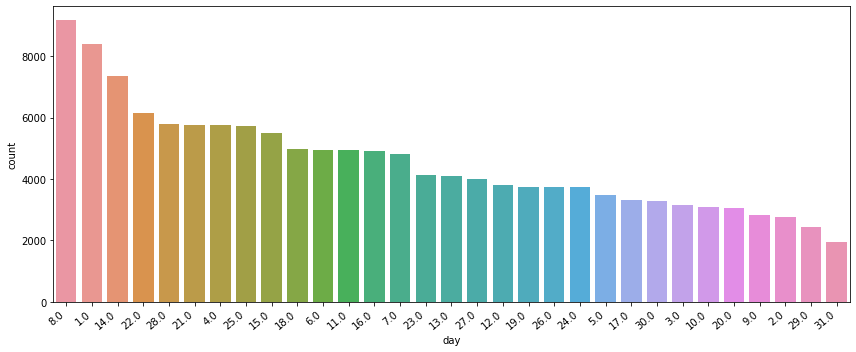

hour


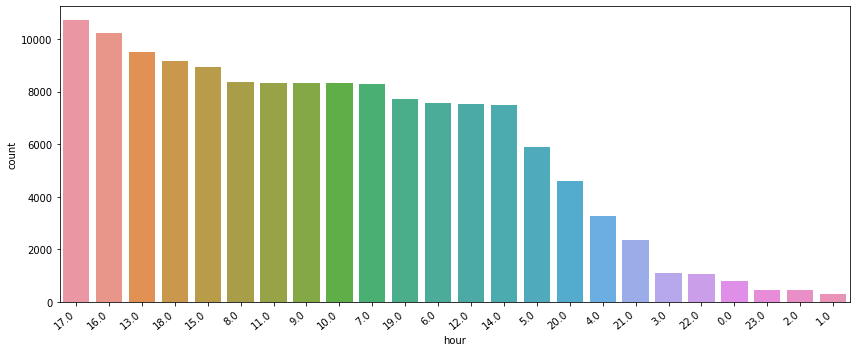

is credit


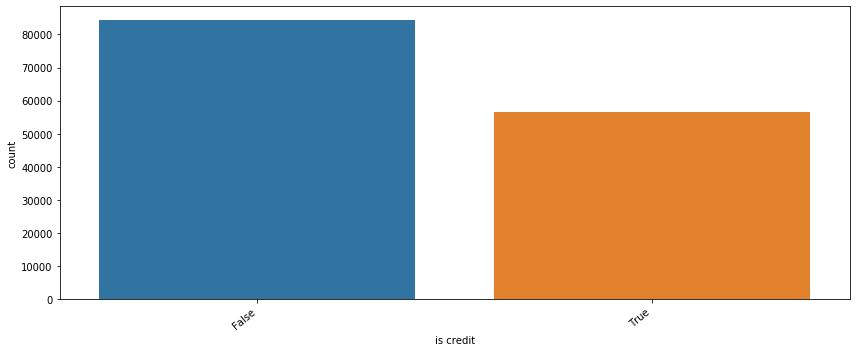

week_of_month


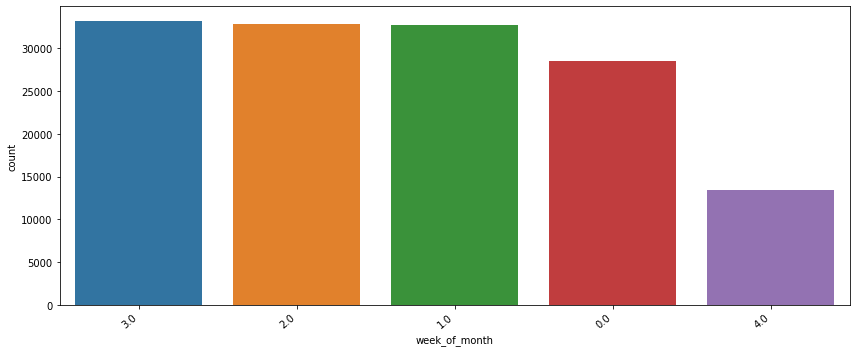

In [80]:
for col in cat_co:
        print(col)
        plt.figure(figsize=(12,5))
        ax=sns.countplot(data[col],order = data[col].value_counts().index)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.tight_layout()
        plt.show()

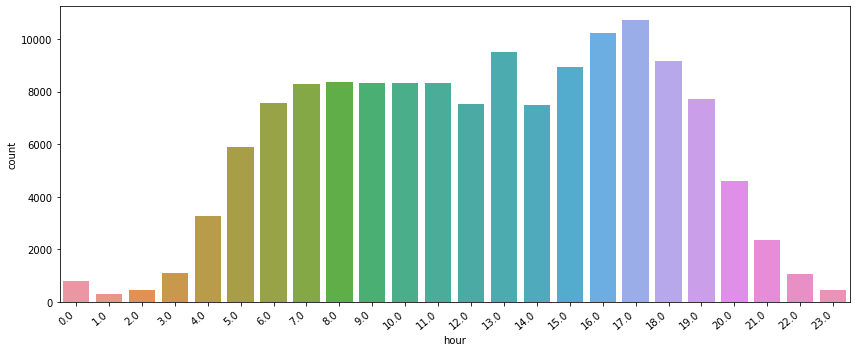

In [81]:
plt.figure(figsize=(12,5))
ax=sns.countplot(data['hour'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# Multivariate

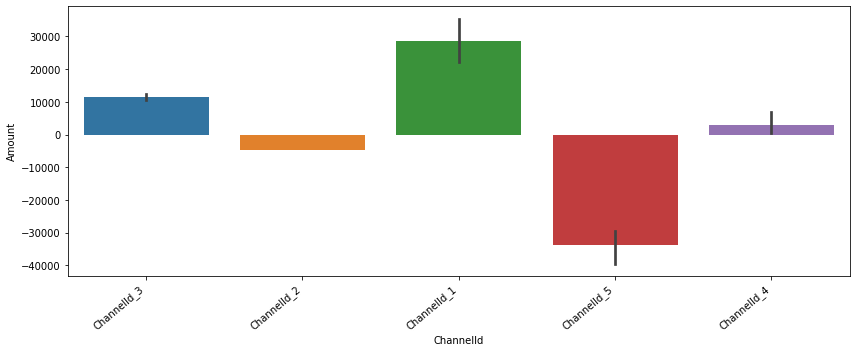

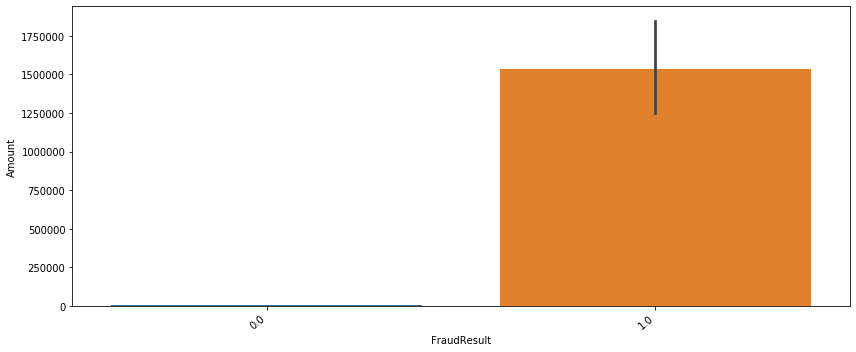

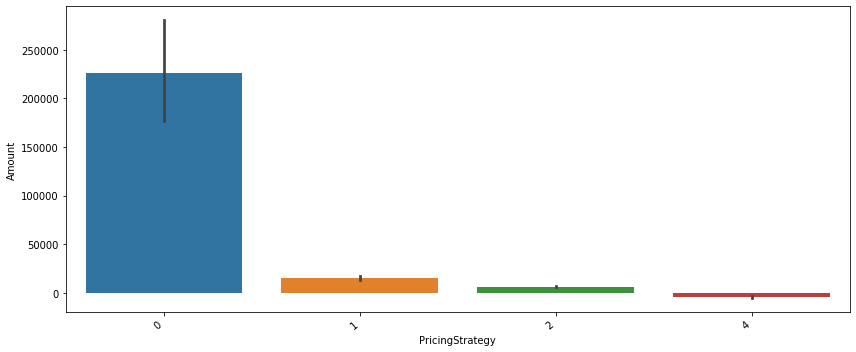

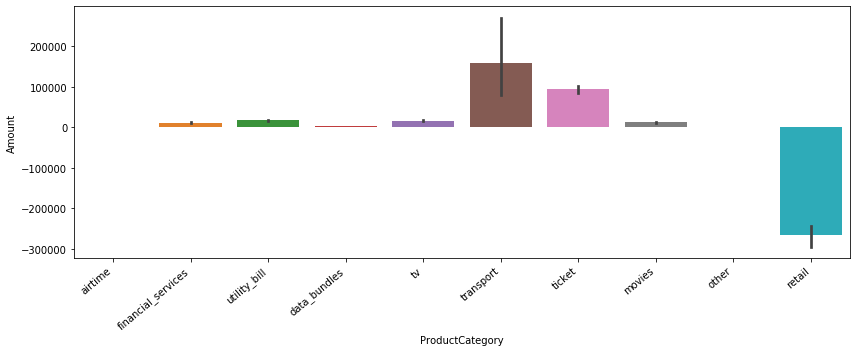

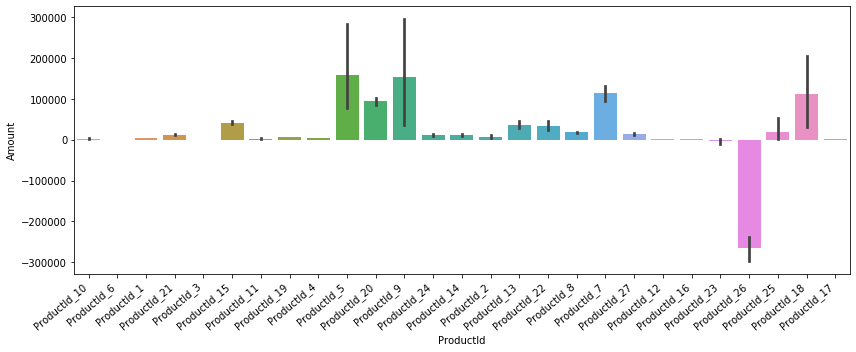

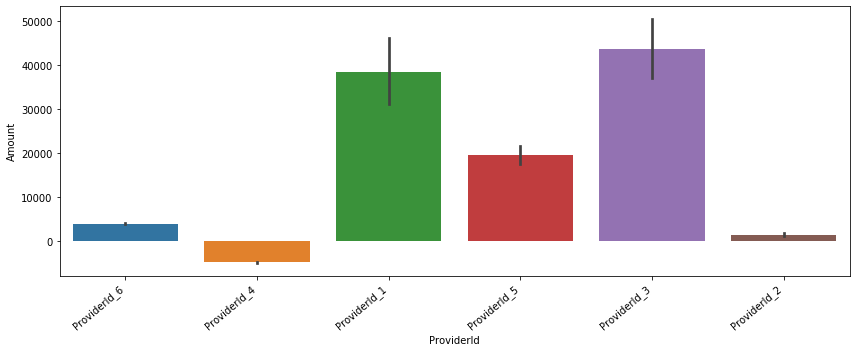

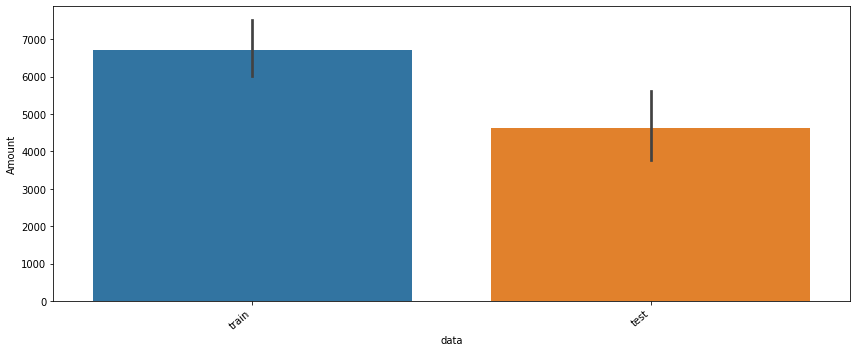

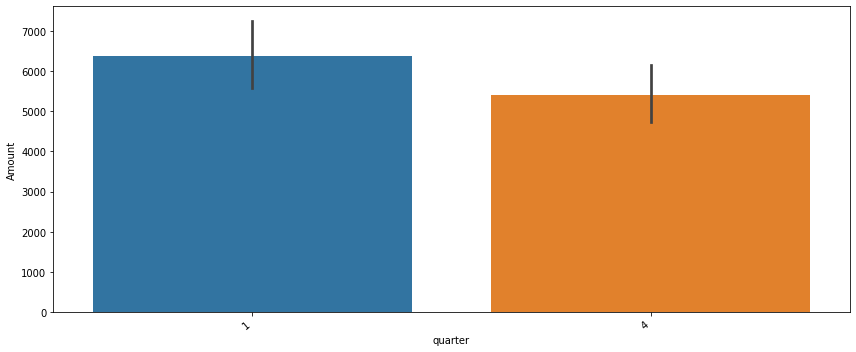

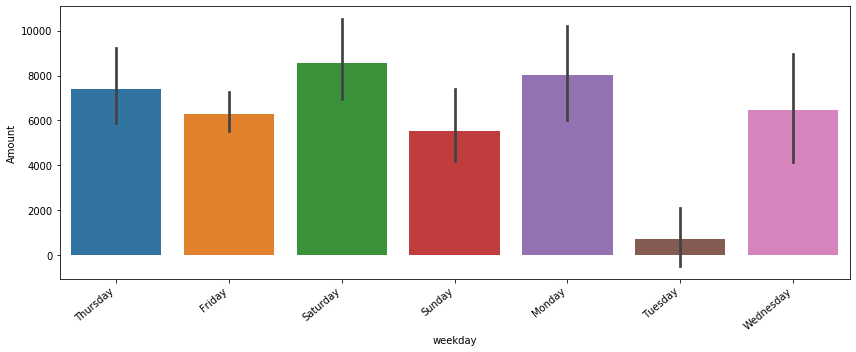

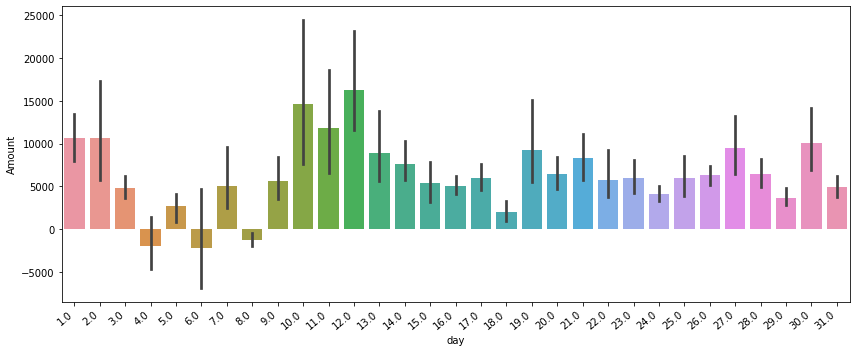

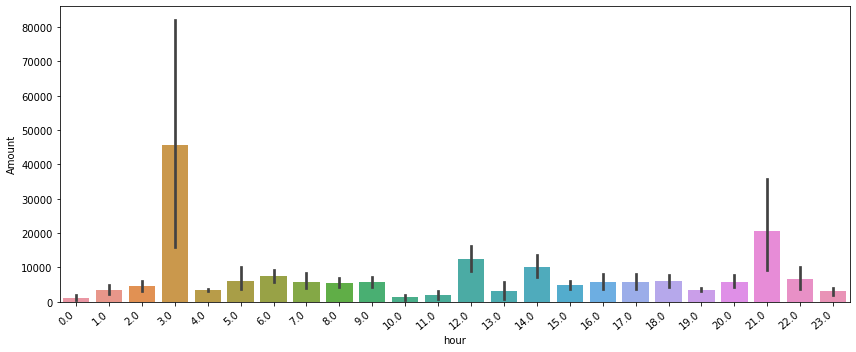

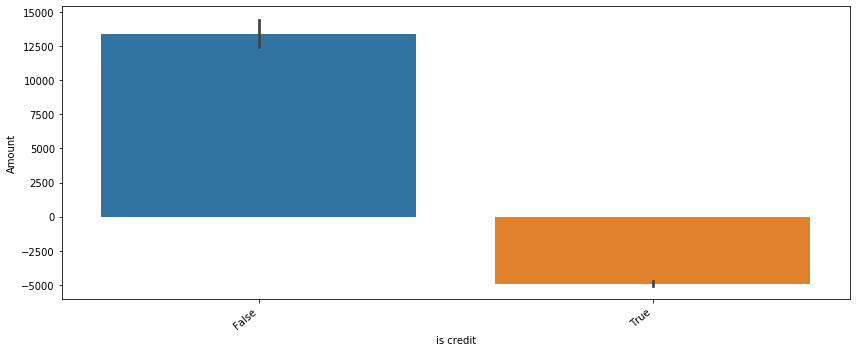

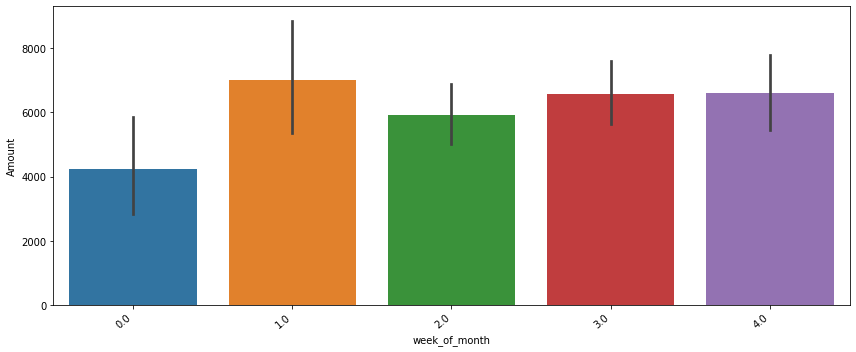

In [82]:
for col in cat_co:
    plt.figure(figsize=(12,5))
    ax=sns.barplot(data=data,x=col,y='Amount')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

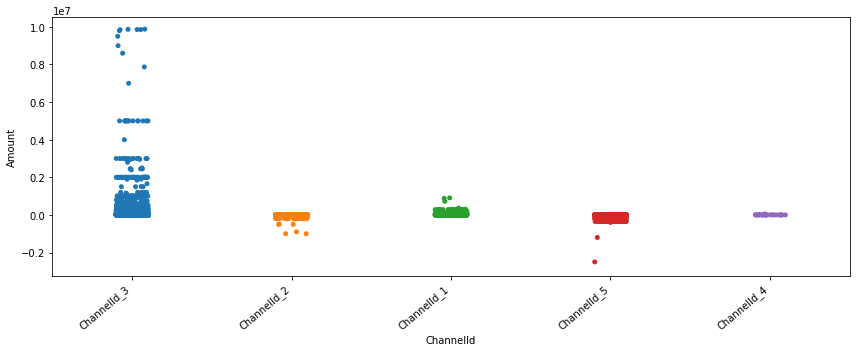

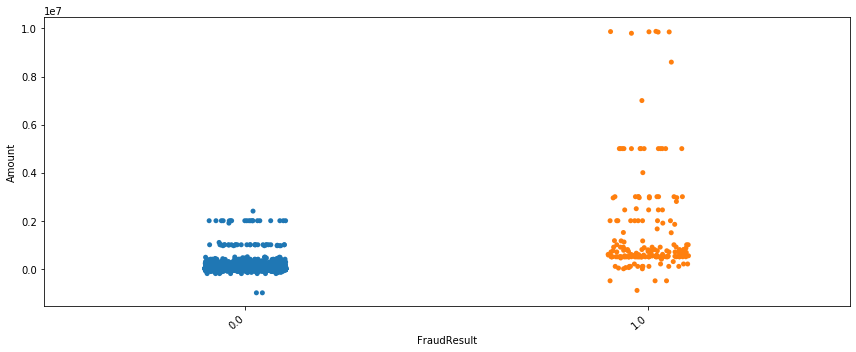

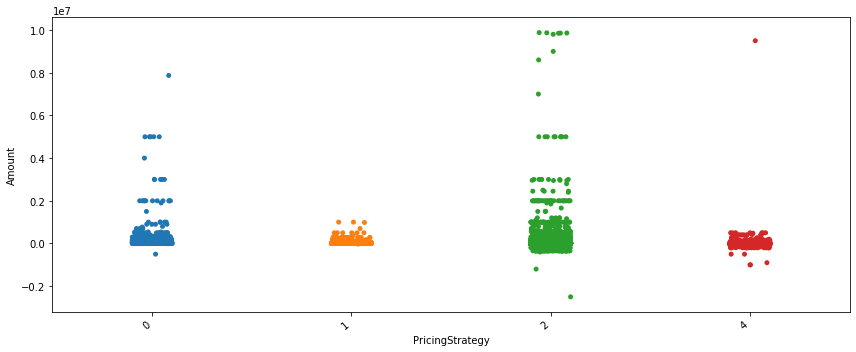

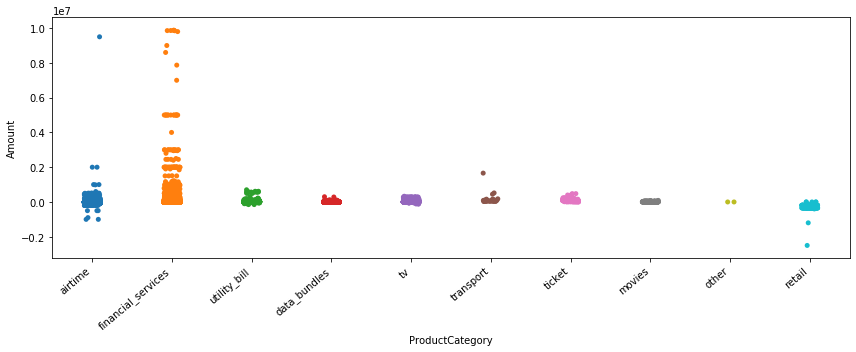

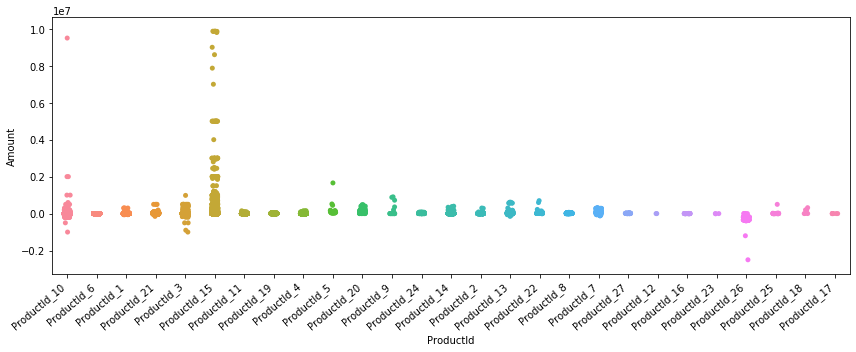

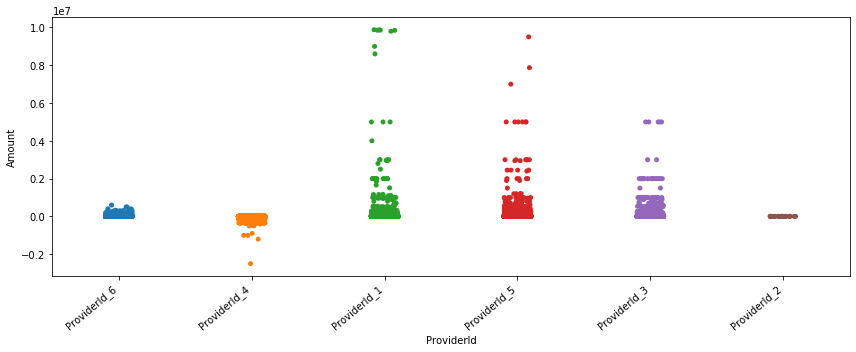

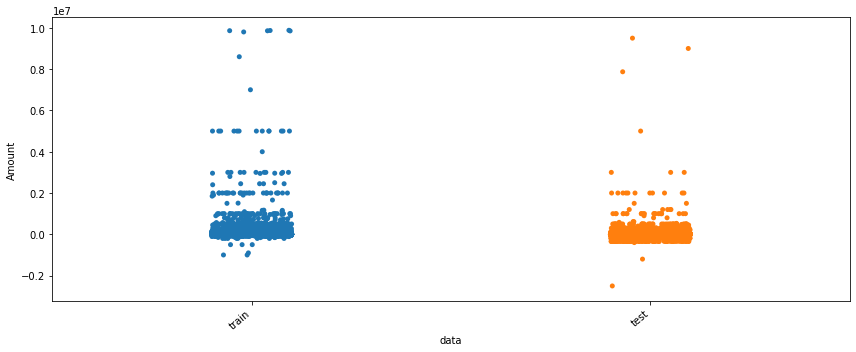

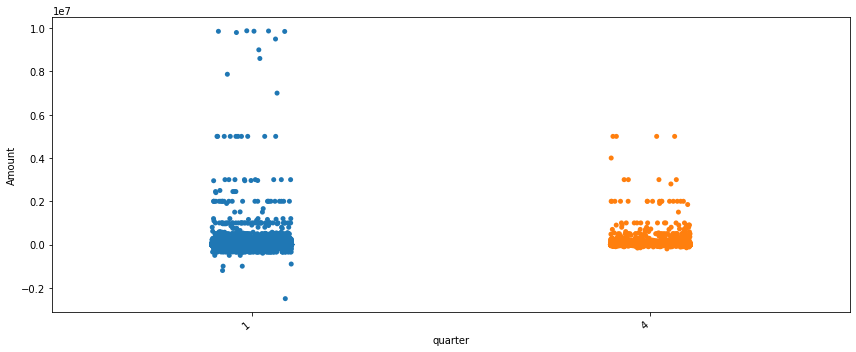

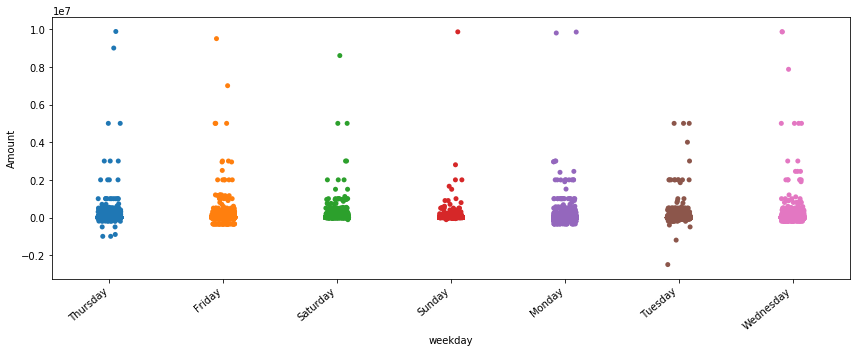

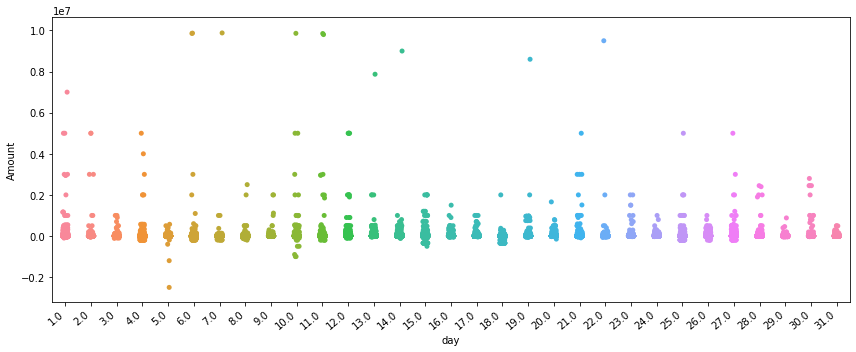

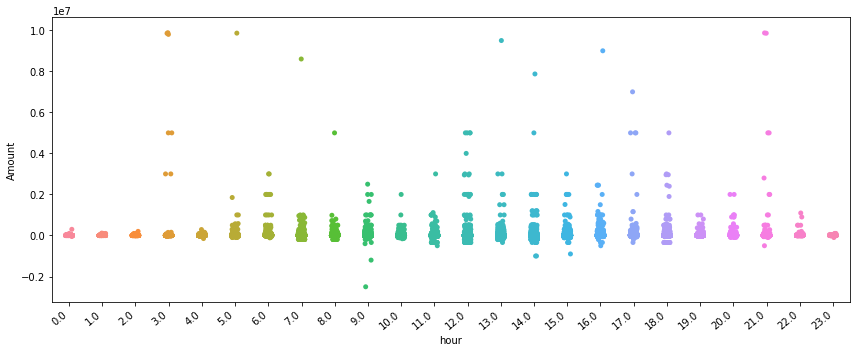

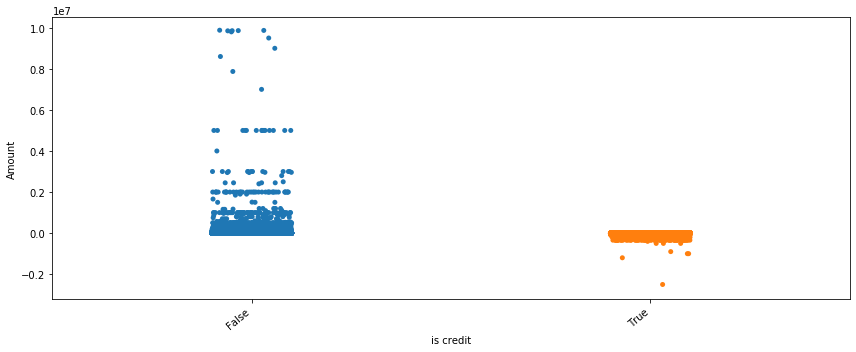

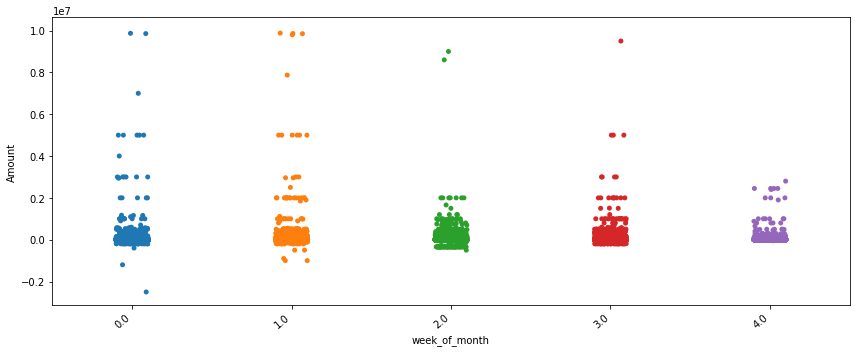

In [83]:
for col in cat_co:
    plt.figure(figsize=(12,5))
    ax=sns.stripplot(data=data,x=col,y='Amount')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

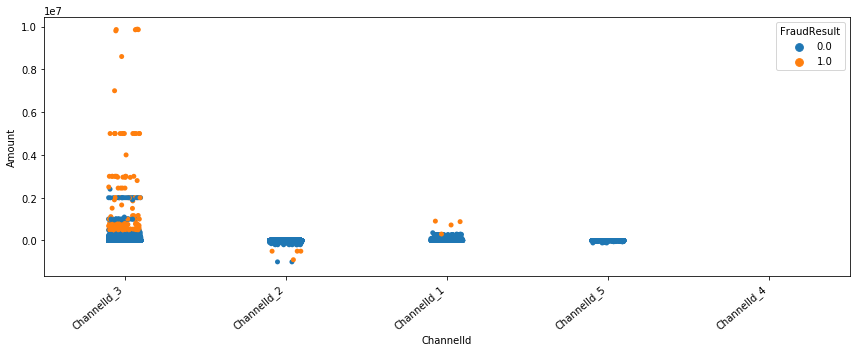

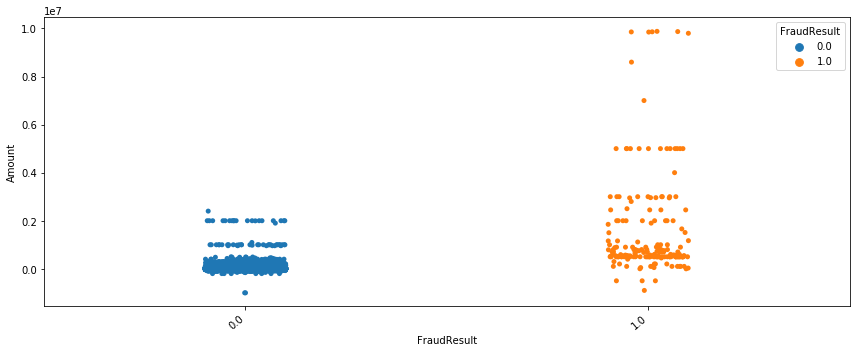

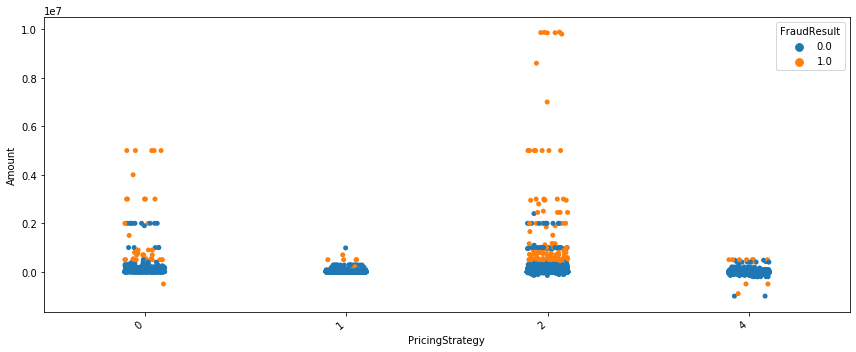

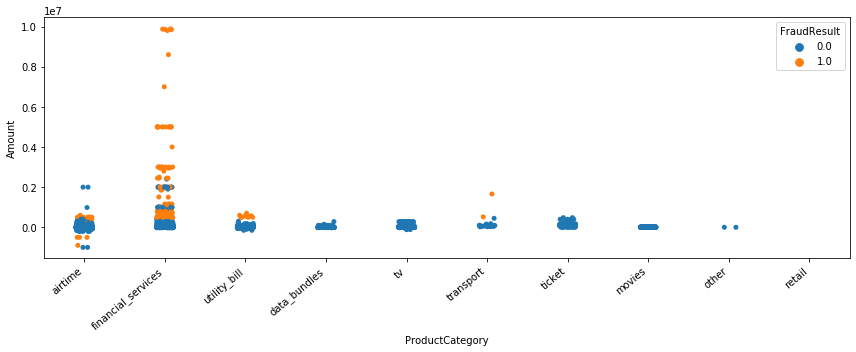

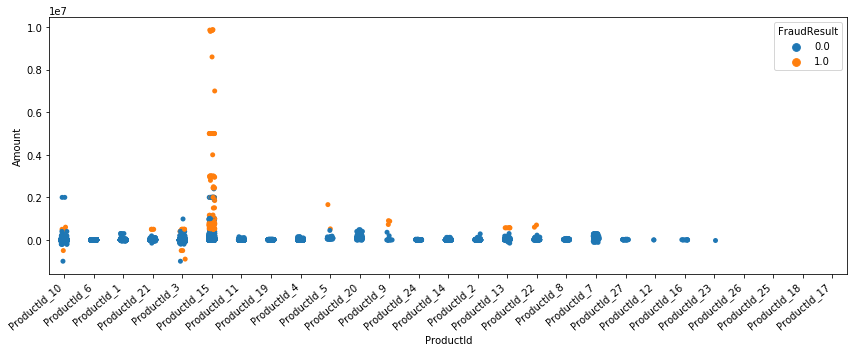

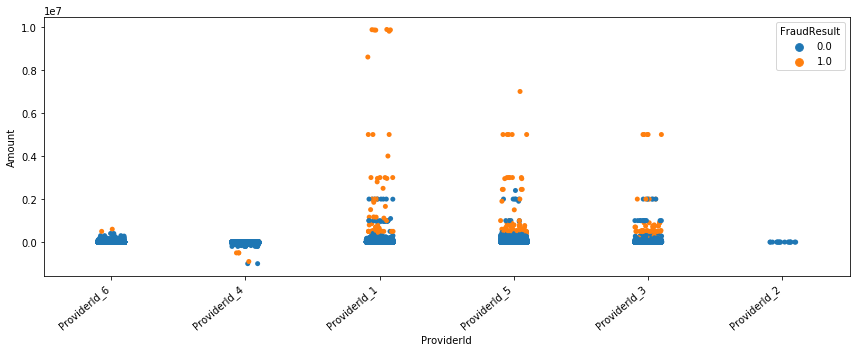

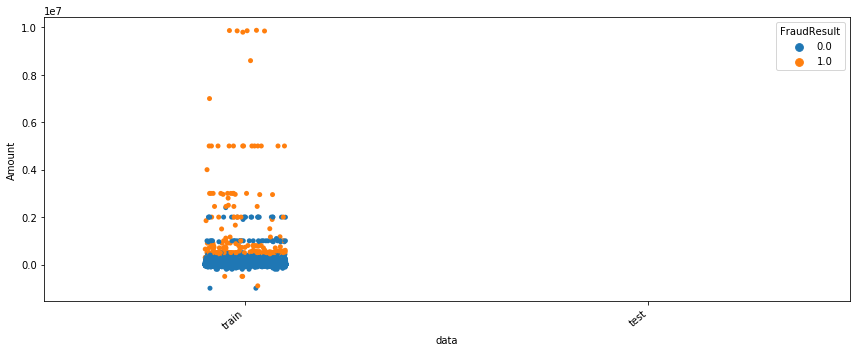

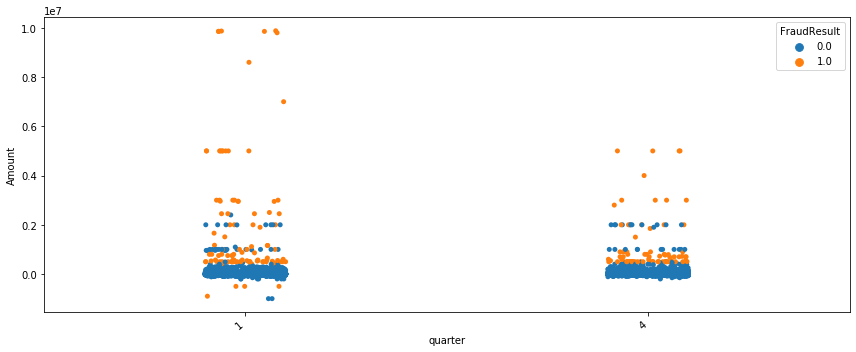

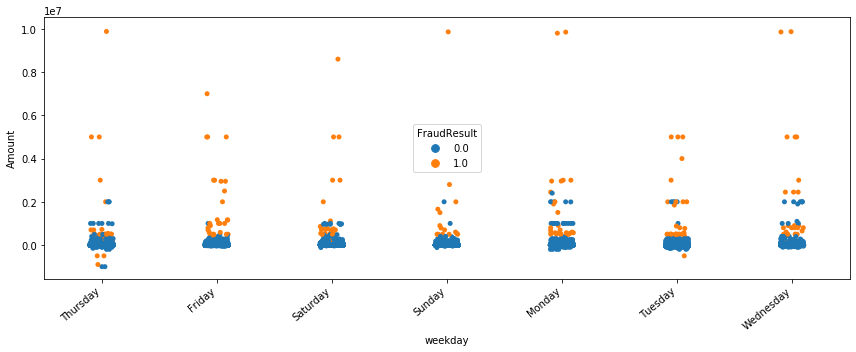

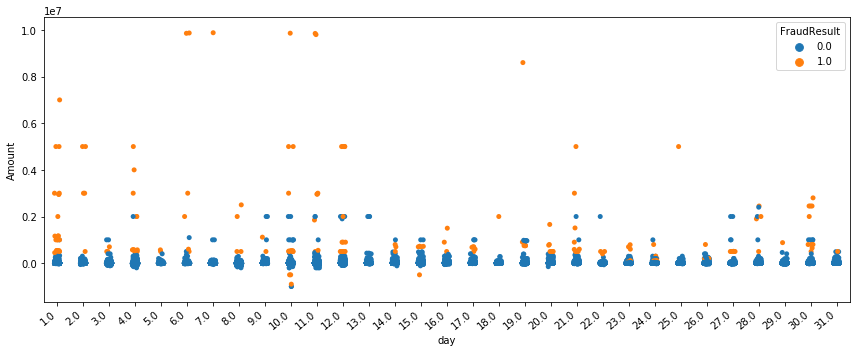

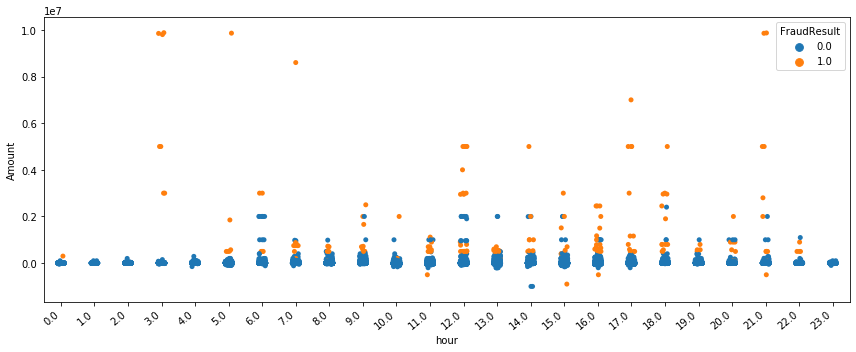

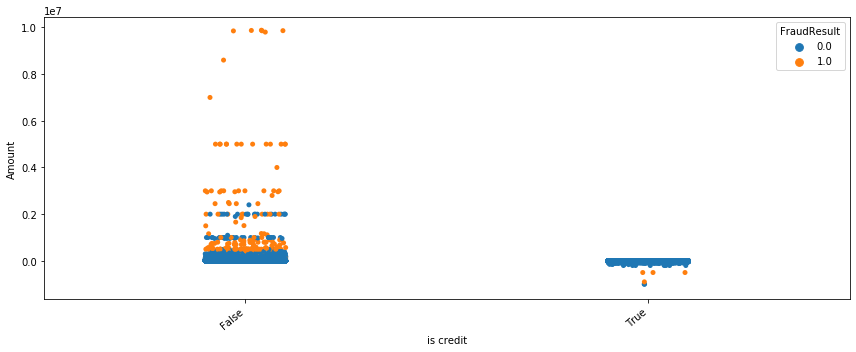

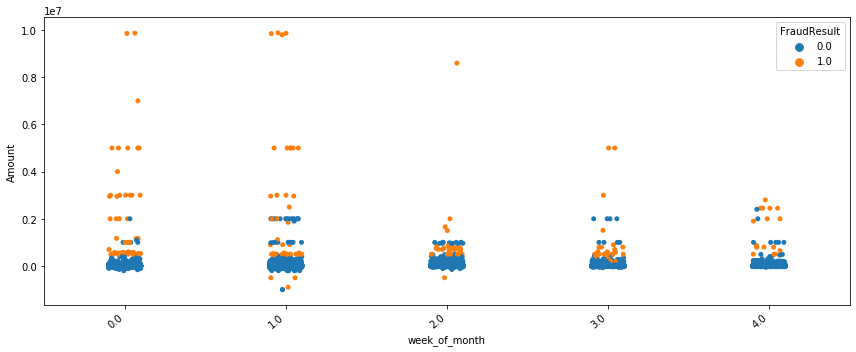

In [84]:
for col in cat_co:
    plt.figure(figsize=(12,5))
    ax=sns.stripplot(data=data,x=col,y='Amount',hue='FraudResult')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

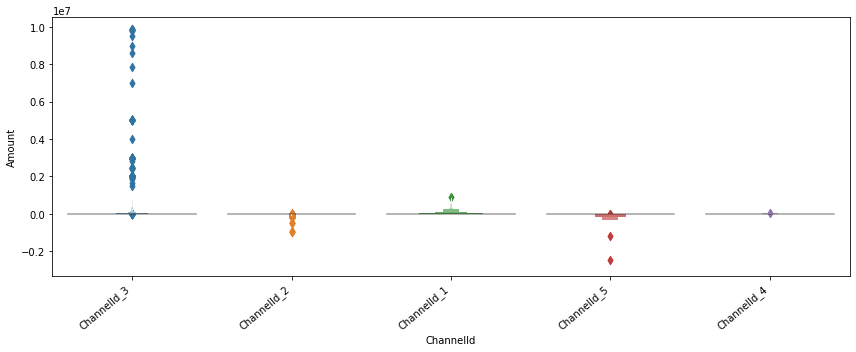

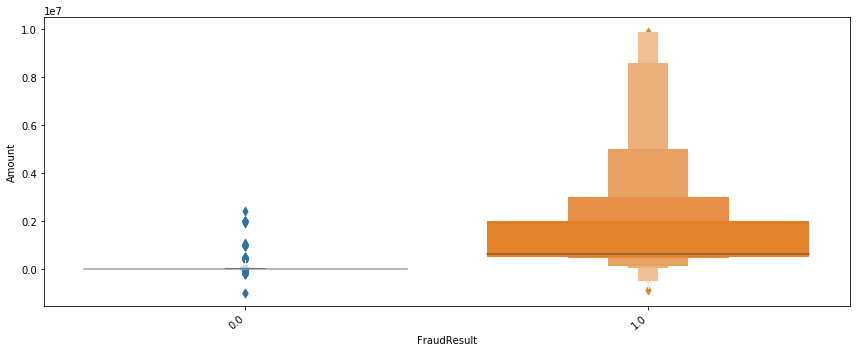

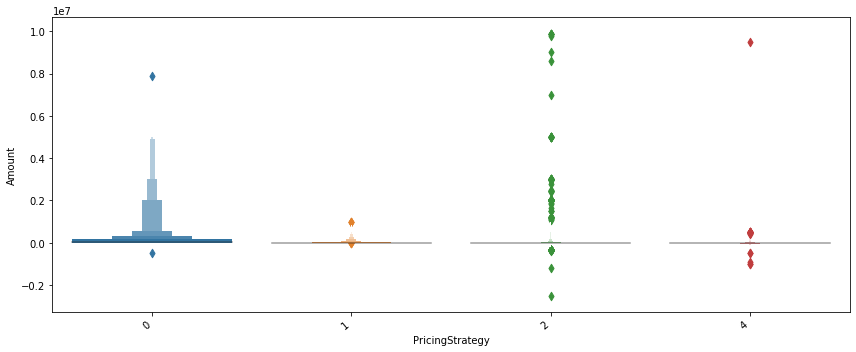

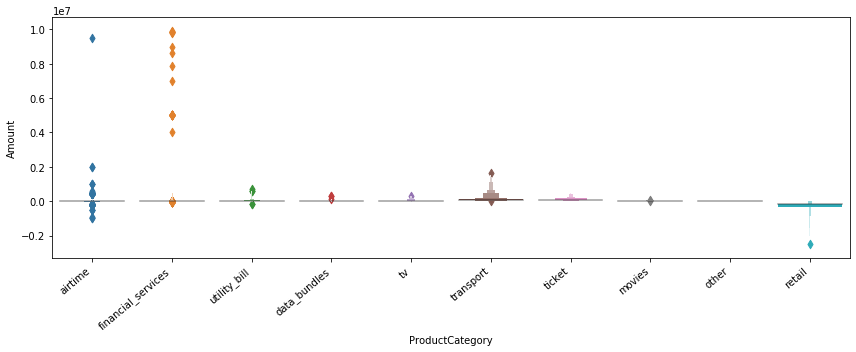

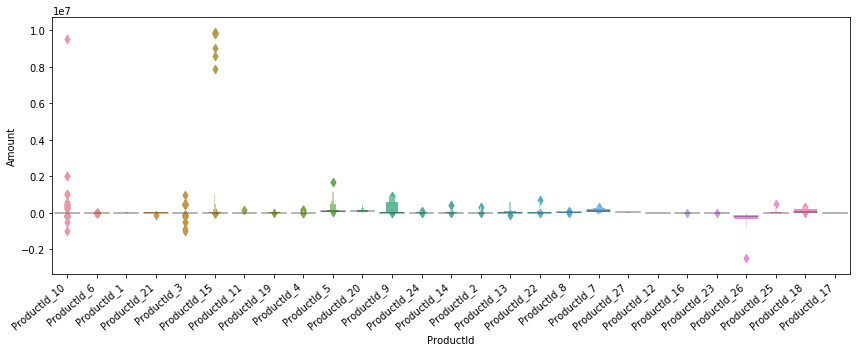

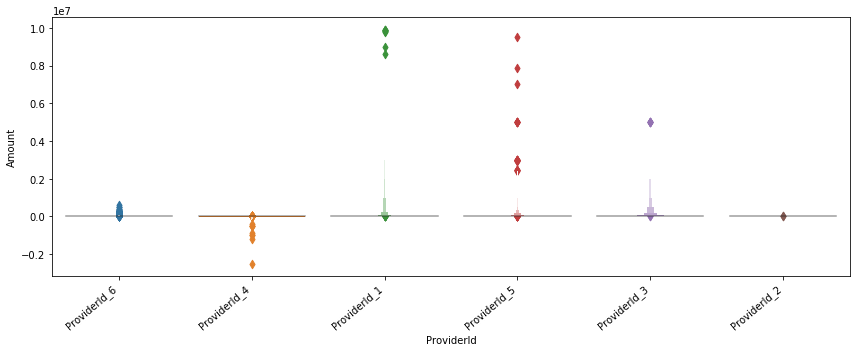

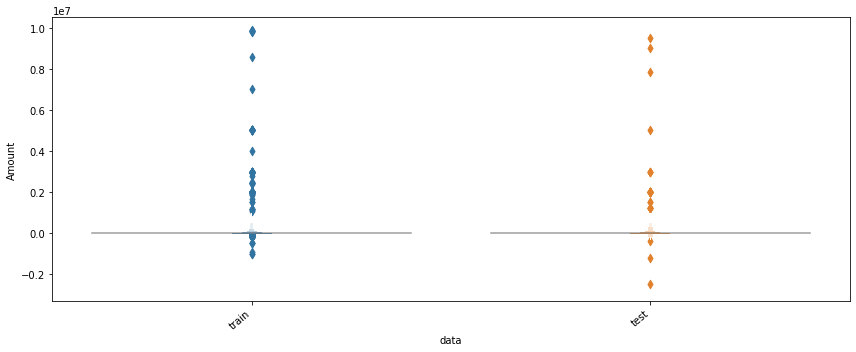

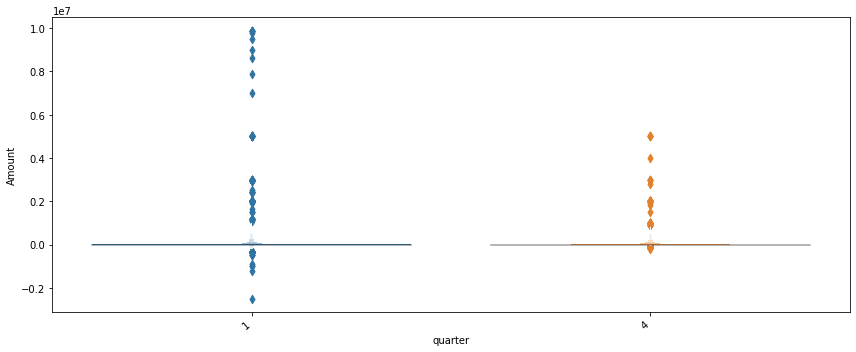

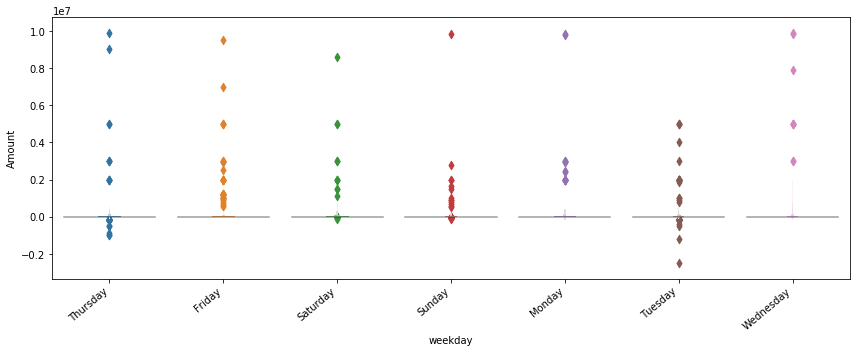

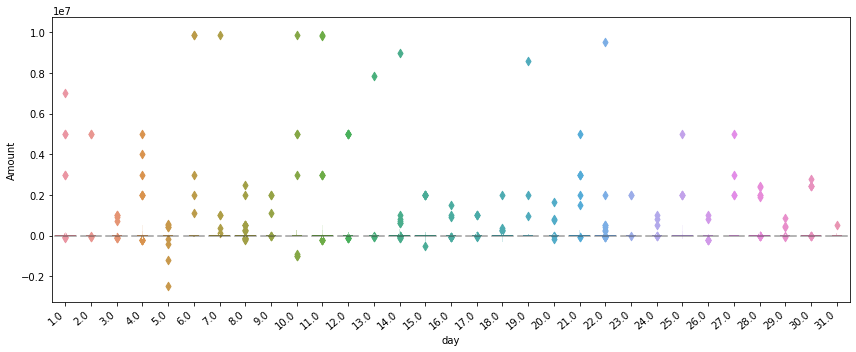

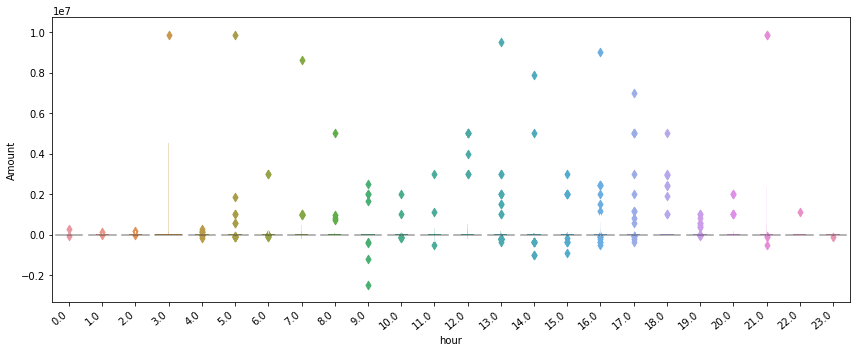

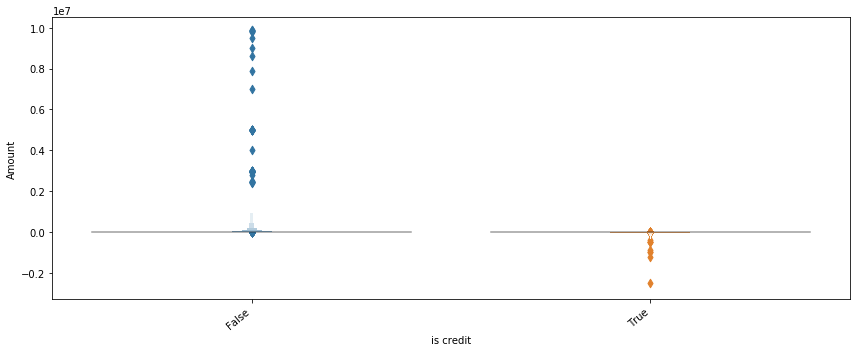

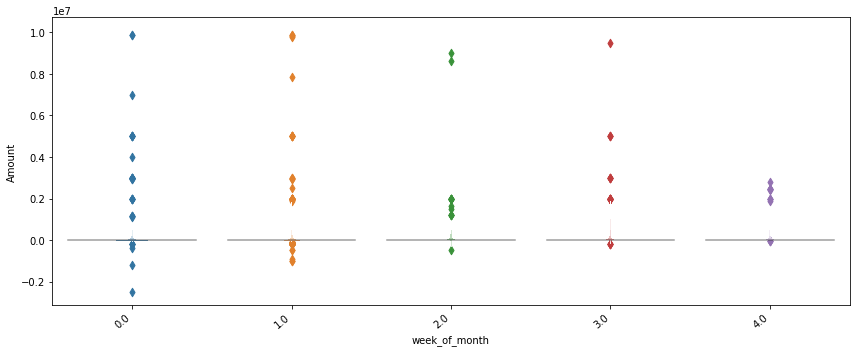

In [85]:
for col in cat_co:
    plt.figure(figsize=(12,5))
    ax=sns.boxenplot(data=data,x=col,y='Amount')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

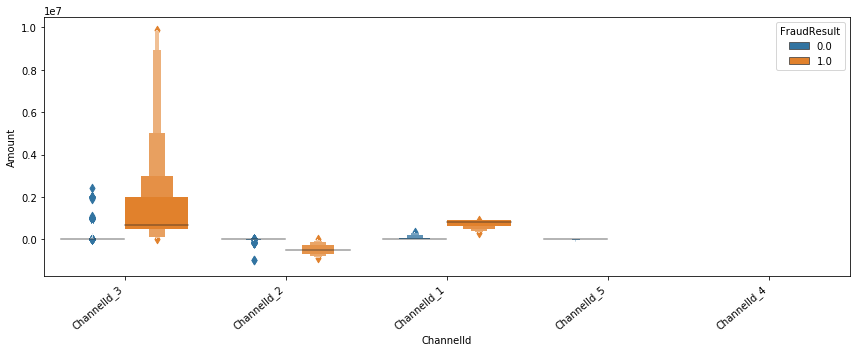

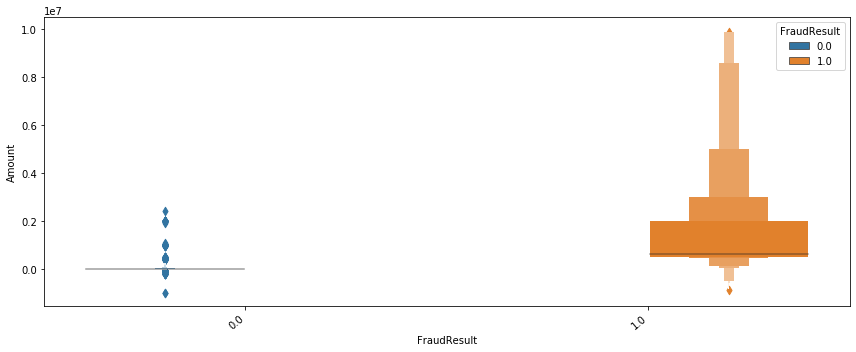

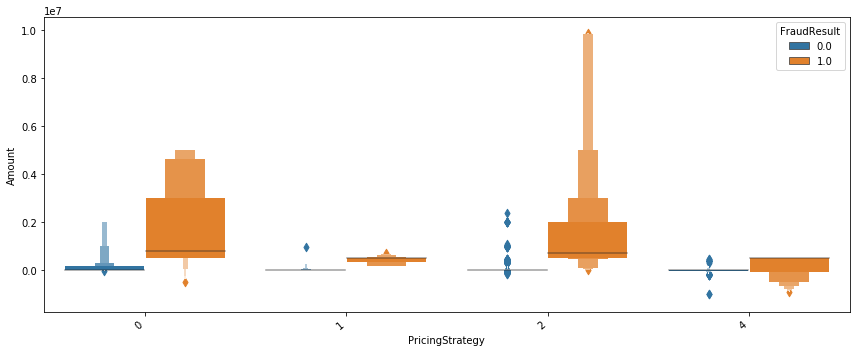

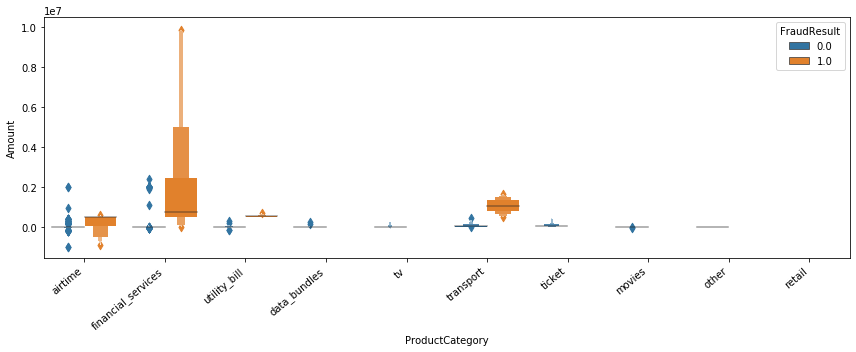

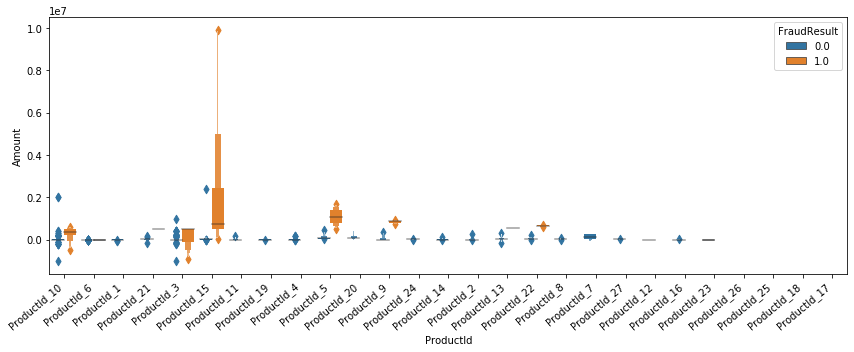

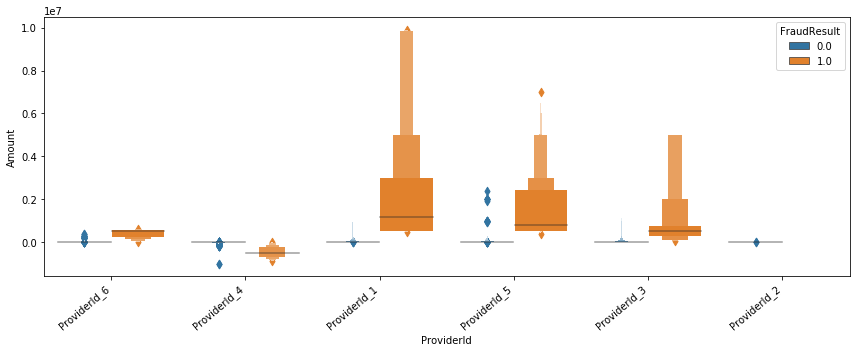

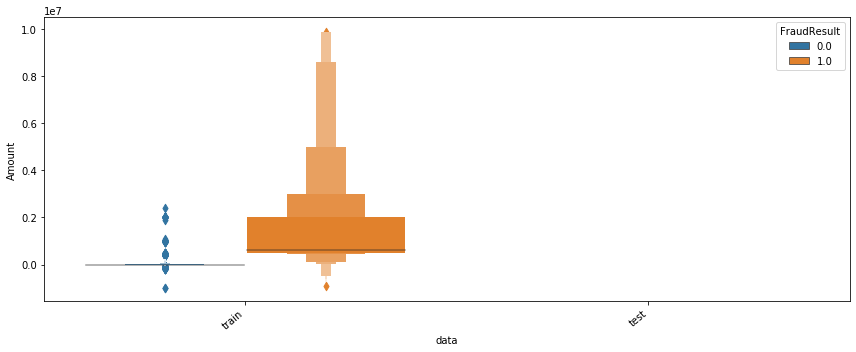

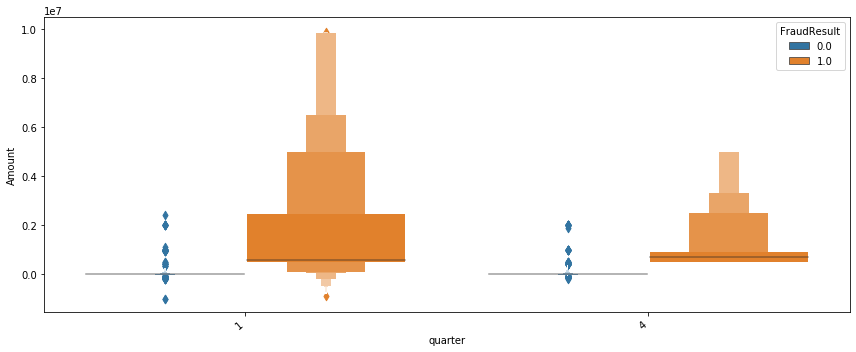

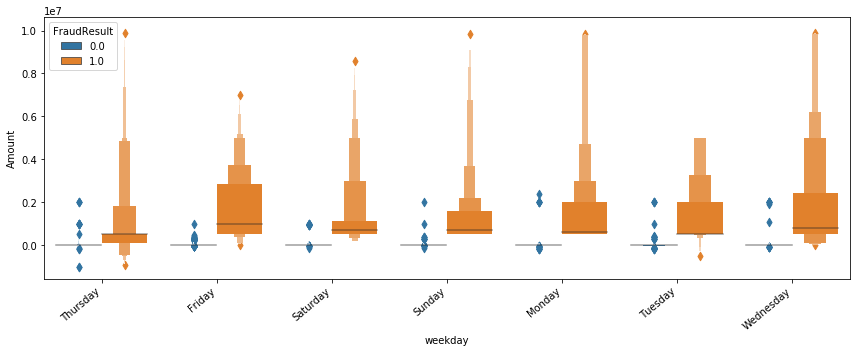

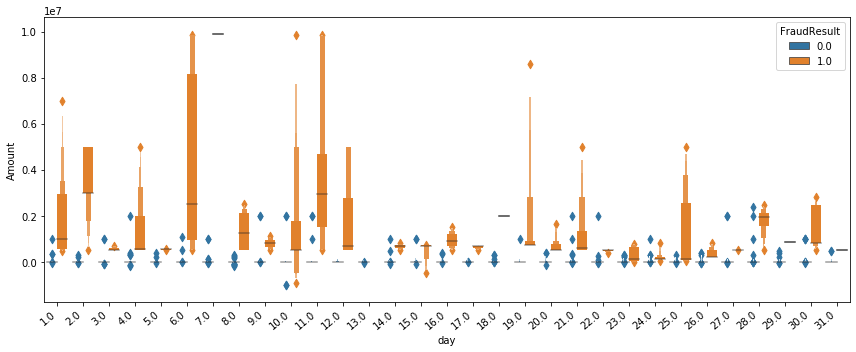

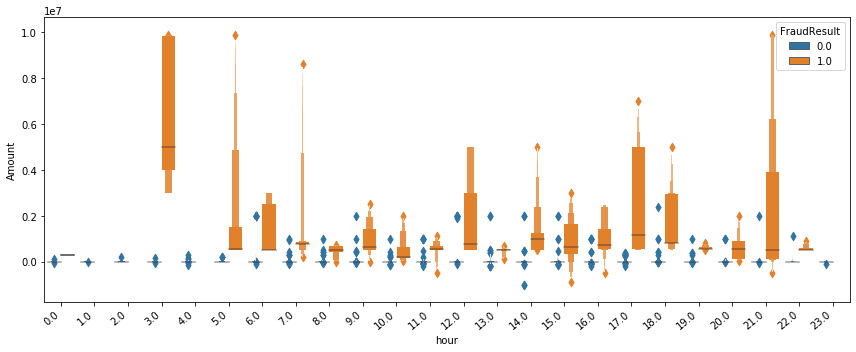

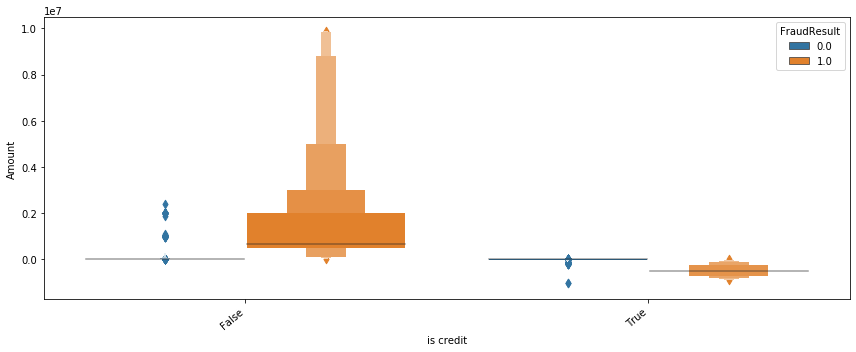

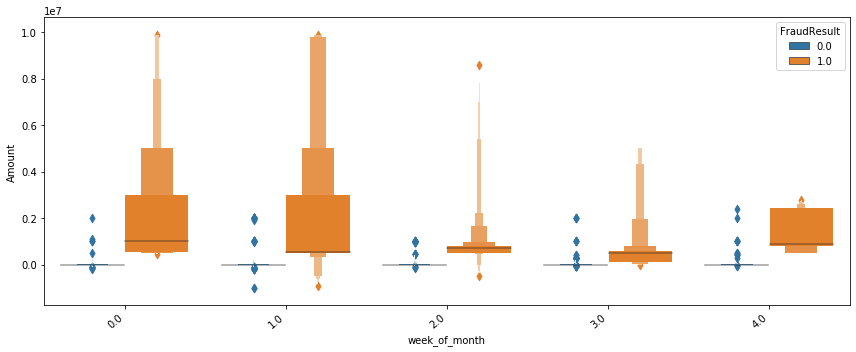

In [86]:
for col in cat_co:
    plt.figure(figsize=(12,5))
    ax=sns.boxenplot(data=data,x=col,y='Amount',hue='FraudResult')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

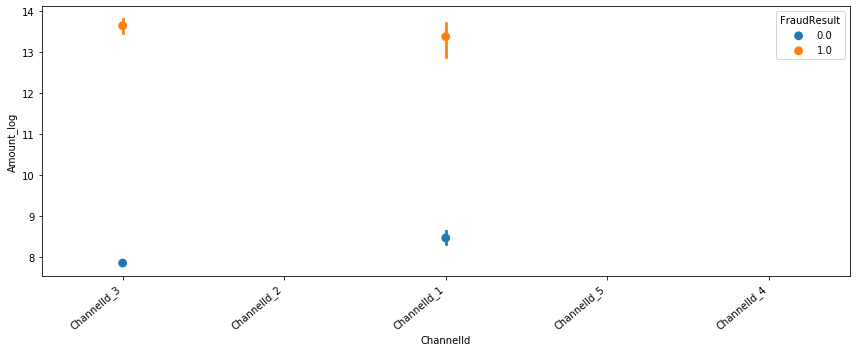

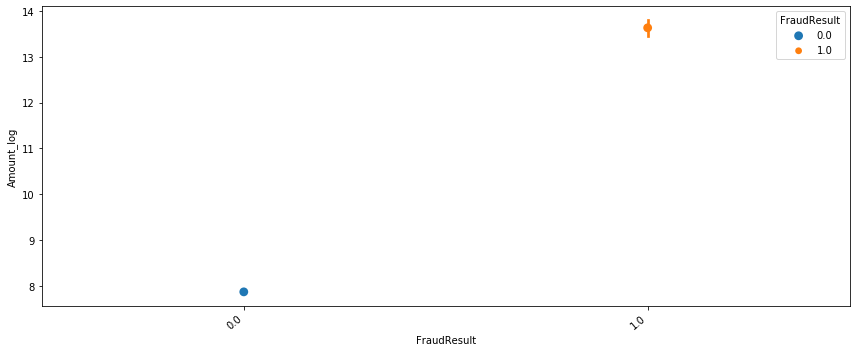

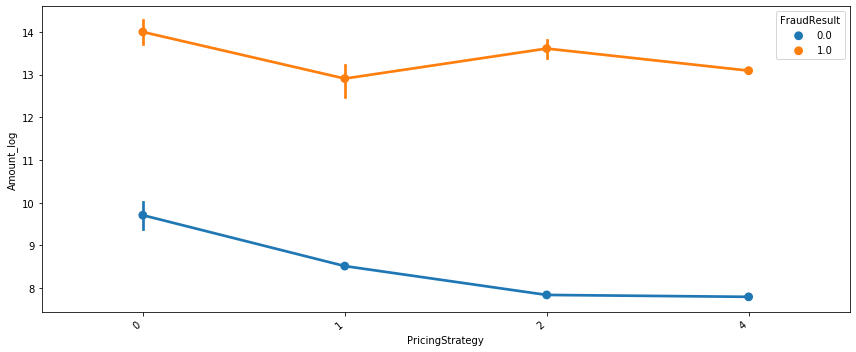

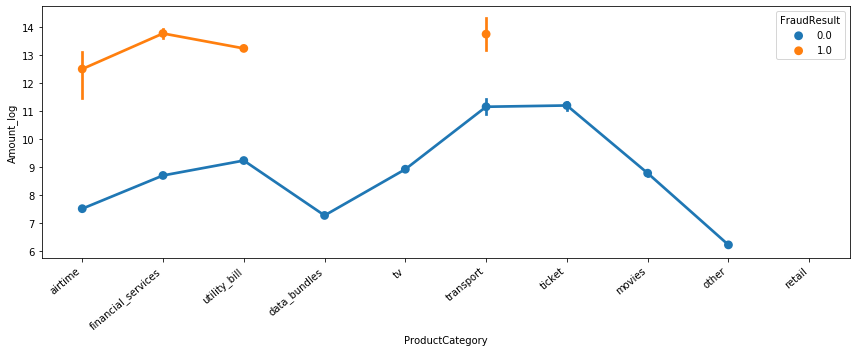

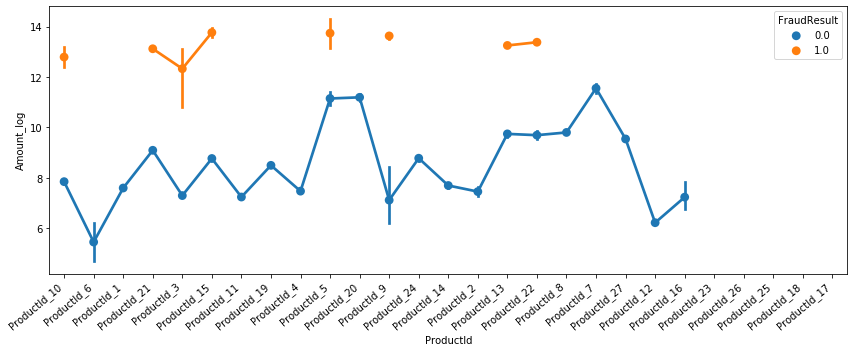

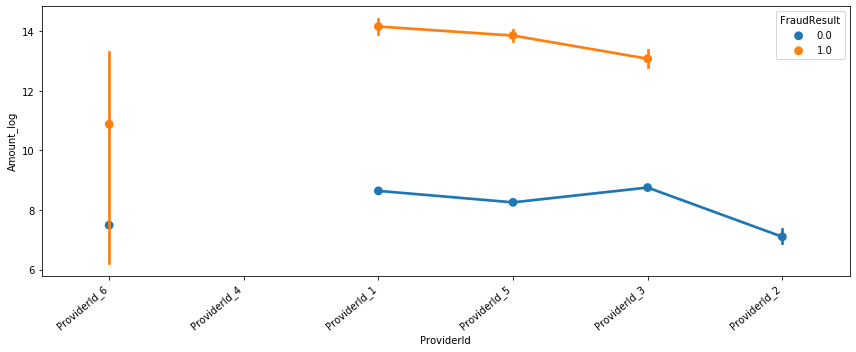

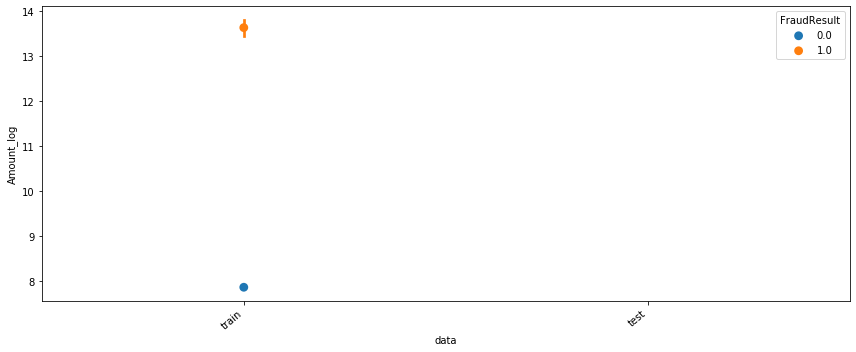

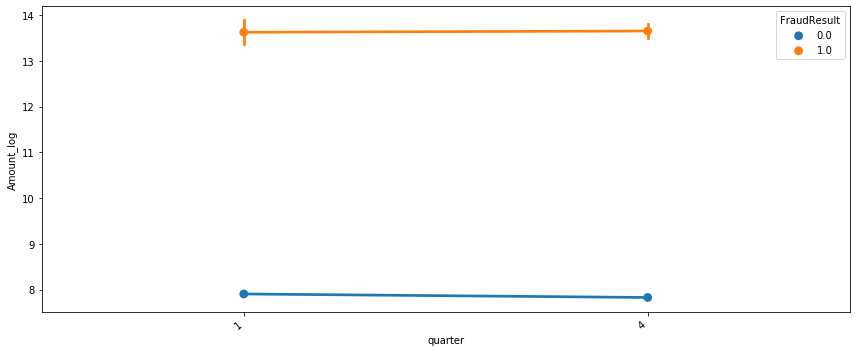

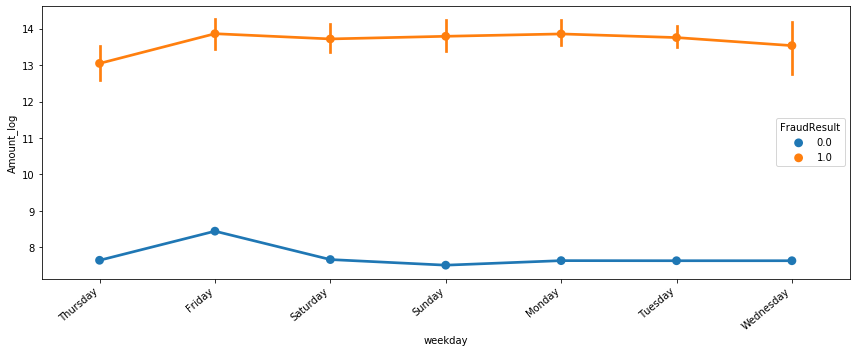

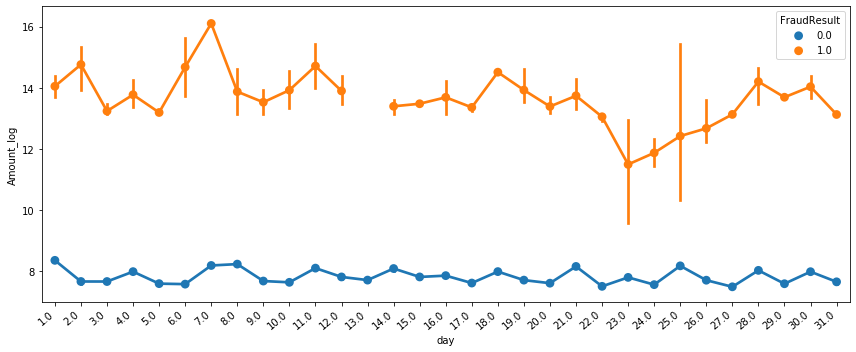

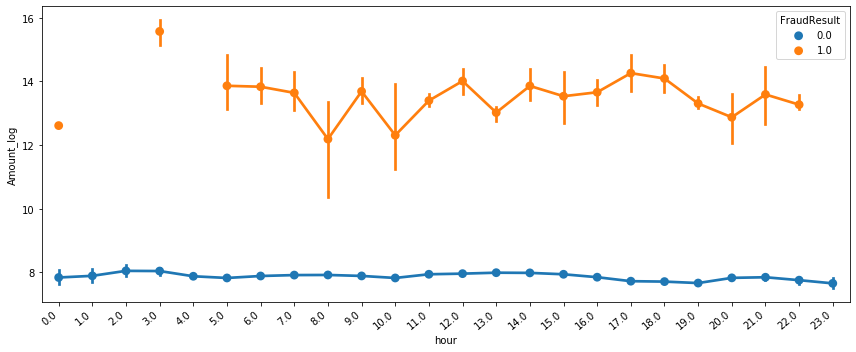

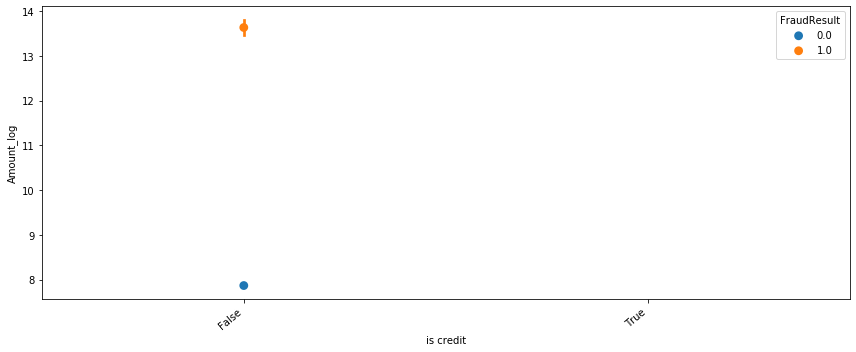

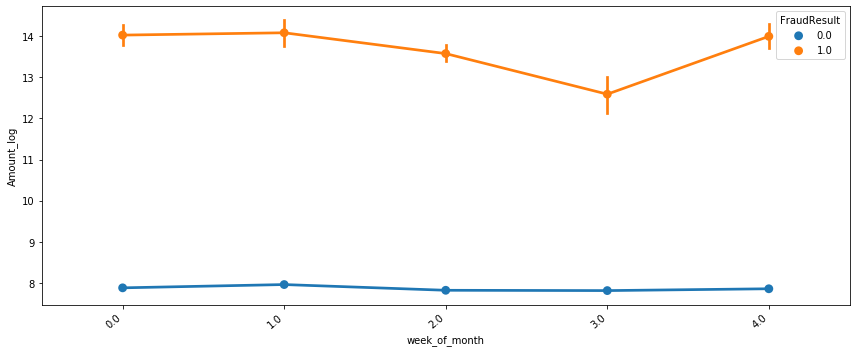

In [87]:
for col in cat_co:
    plt.figure(figsize=(12,5))
    ax=sns.pointplot(data=data,x=col,y=data.Amount_log,hue='FraudResult')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

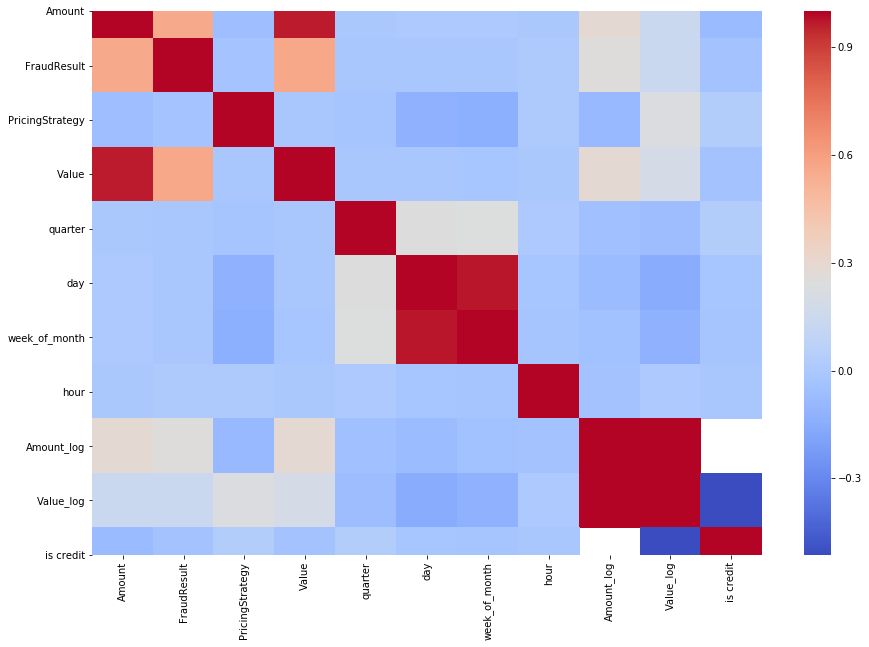

In [88]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap='coolwarm')

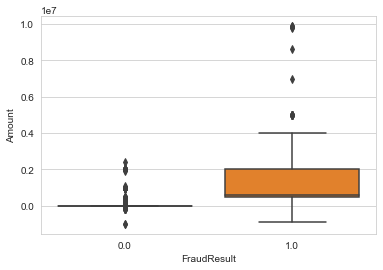

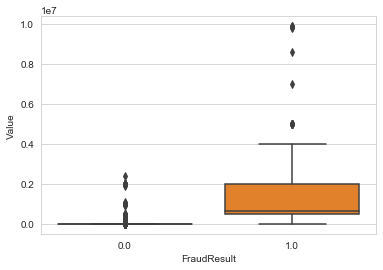

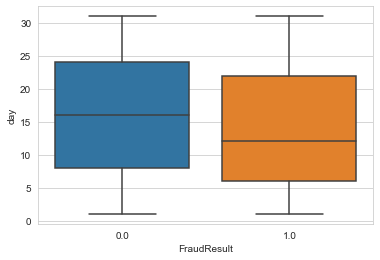

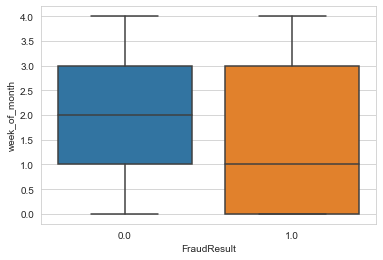

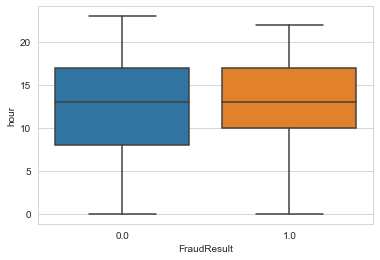

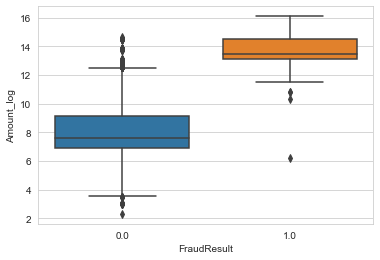

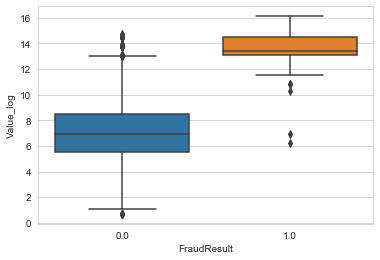

In [89]:
for col in num_col:
        sns.set_style("whitegrid")
        sns.boxplot('FraudResult', col, data=data)
        plt.xlabel('FraudResult') # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

ChannelId


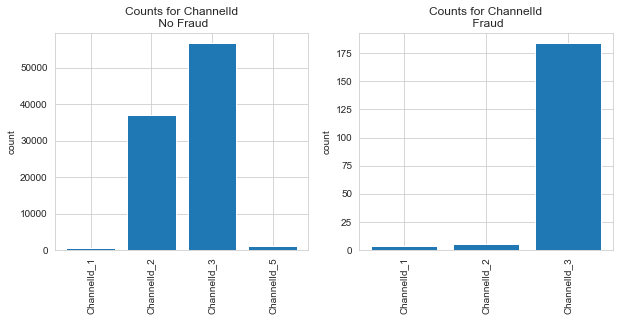

PricingStrategy


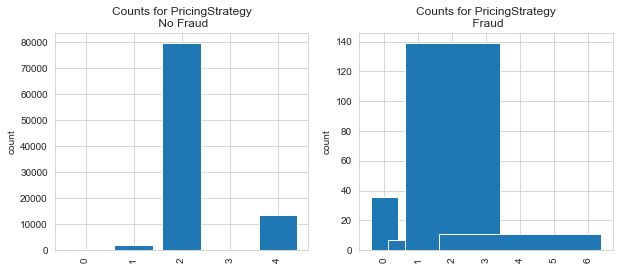

ProductCategory


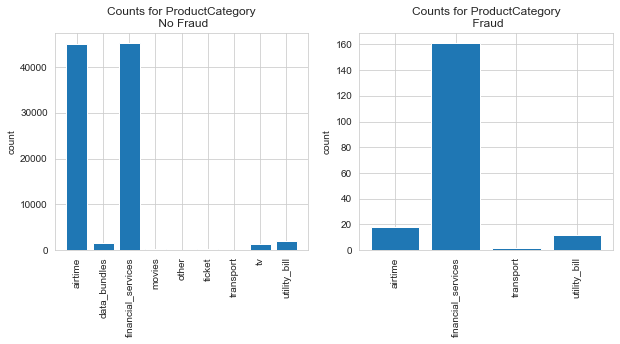

ProductId


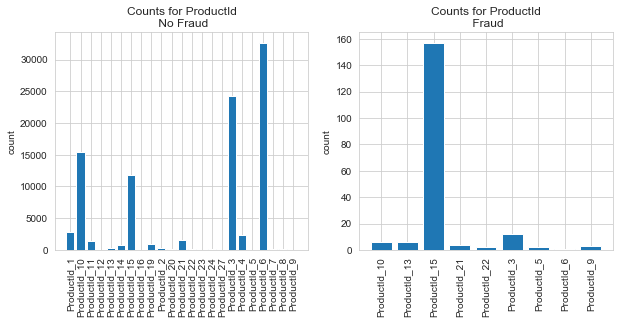

ProviderId


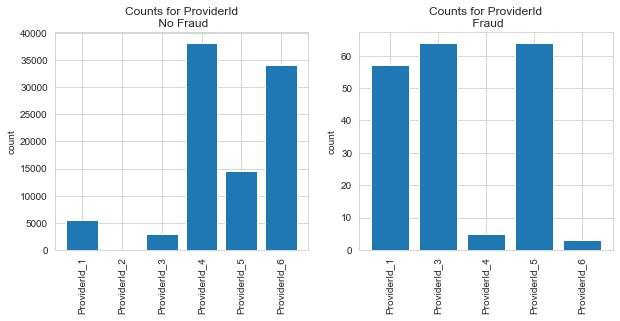

data


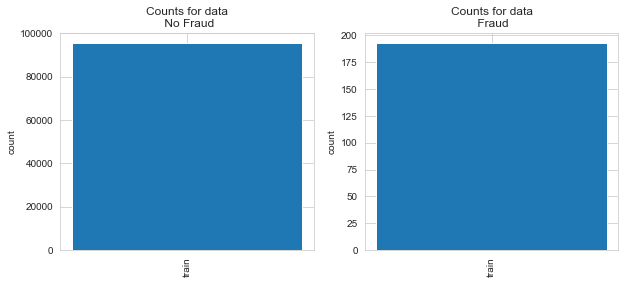

quarter


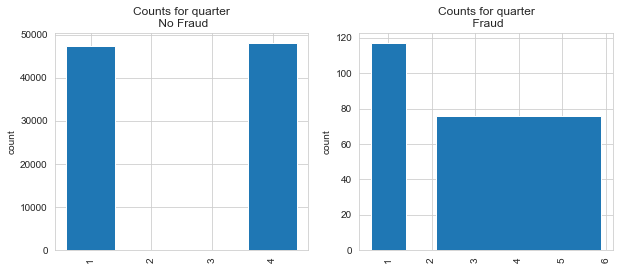

weekday


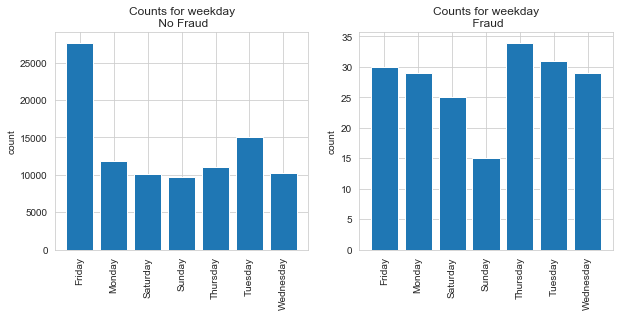

day


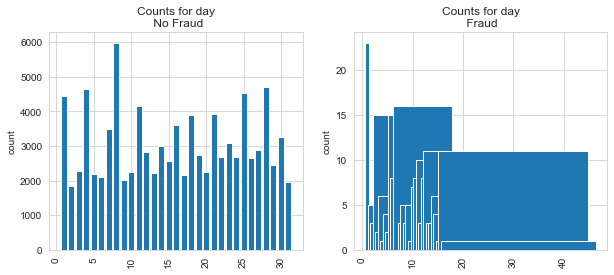

hour


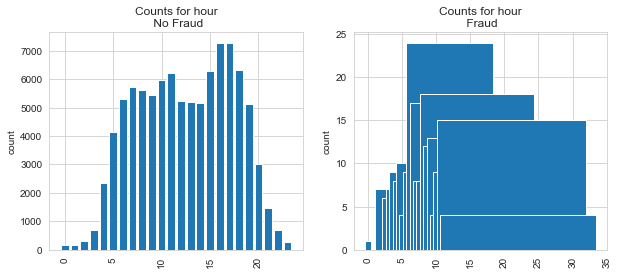

is credit


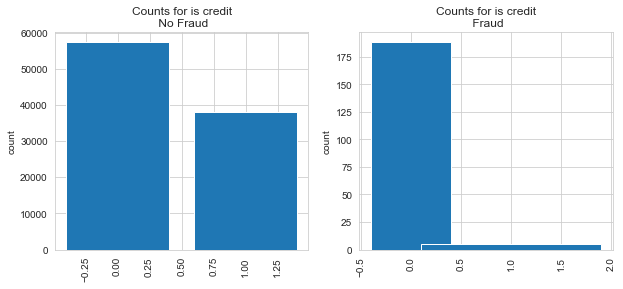

week_of_month


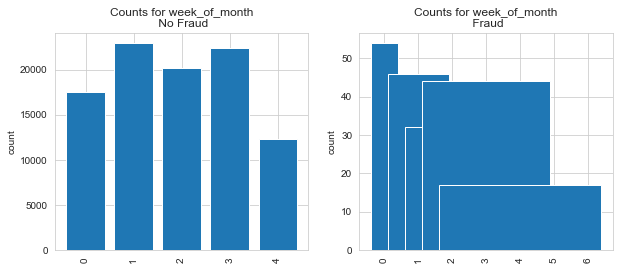

In [90]:
data['dummy'] = np.ones(shape = data.shape[0])
for col in cat_co:
    if col not in  ['FraudResult']:
        print(col)
        counts = data[['dummy', 'FraudResult', col]].groupby(['FraudResult', col], as_index = False).count()
        temp = counts[counts['FraudResult'] == 0][[col, 'dummy']]
        _ = plt.figure(figsize = (10,4))
        plt.subplot(1, 2, 1)
        temp = counts[counts['FraudResult'] == 0][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n No Fraud')
        plt.ylabel('count')
        plt.subplot(1, 2, 2)
        temp = counts[counts['FraudResult'] == 1][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n Fraud')
        plt.ylabel('count')
        plt.show()

del data['dummy']

# Feature ENGINEERING

In [91]:
data.ProductCategory=data.ProductCategory.map({'financial_services':'financial_services',
                                               'airtime':'airtime'}).fillna('others')

In [92]:
data.ChannelId=data.ChannelId.map({'ChannelId_2':'ChannelId_2',
                                   'ChannelId_3':'ChannelId_3'}).fillna('others')

In [93]:
data.ProductId=data.ProductId.map({'ProductId_5':'ProductId_22',
                                     'ProductId_9':'ProductId_22',
                                    'ProductId_22':'ProductId_22',
                                    'ProductId_6':'ProductId_6',
                                    'ProductId_3':'ProductId_3',
                                    'ProductId_10':'ProductId_10',
                                    'ProductId_15':'ProductId_15',}).fillna('others')

In [94]:
data.ProviderId=data.ProviderId.map({'ProviderId_2':'others','ProviderId_3':'others'}).fillna(data.ProviderId)

In [95]:
data.head()

AccountId   Amount         BatchId    ChannelId       CustomerId  \
0  AccountId_3957   1000.0   BatchId_36123  ChannelId_3  CustomerId_4406   
1  AccountId_4841    -20.0   BatchId_15642  ChannelId_2  CustomerId_4406   
2  AccountId_4229    500.0   BatchId_53941  ChannelId_3  CustomerId_4683   
3   AccountId_648  20000.0  BatchId_102363  ChannelId_3   CustomerId_988   
4  AccountId_4841   -644.0   BatchId_38780  ChannelId_2   CustomerId_988   

   FraudResult  PricingStrategy     ProductCategory     ProductId  \
0          0.0                2             airtime  ProductId_10   
1          0.0                2  financial_services   ProductId_6   
2          0.0                2             airtime        others   
3          0.0                2              others        others   
4          0.0                2  financial_services   ProductId_6   

     ProviderId  ...    Value   data quarter   day week_of_month   weekday  \
0  ProviderId_6  ...   1000.0  train       4  15.0           2.0  Thursday   
1  ProviderId_4  ...     20.0  train       4  15.0           2.0  Thursday   
2  ProviderId_6  ...    500.0  train       4  15.0           2.0  Thursday   
3  ProviderId_1  ...  21800.0  train       4  15.0           2.0  Thursday   
4  ProviderId_4  ...    644.0  train       4  15.0           2.0  Thursday   

   hour  Amount_log Value_log  is credit  
0   2.0    6.907755  6.907755      False  
1   2.0         NaN  2.995732       True  
2   2.0    6.214608  6.214608      False  
3   3.0    9.903488  9.989665      False  
4   3.0         NaN  6.467699       True  

[5 rows x 23 columns]

In [96]:
data.isnull().sum()

AccountId                   0
Amount                      0
BatchId                     0
ChannelId                   0
CustomerId                  0
FraudResult             45019
PricingStrategy             0
ProductCategory             0
ProductId                   0
ProviderId                  0
SubscriptionId              0
TransactionId               0
TransactionStartTime        0
Value                       0
data                        0
quarter                     0
day                         0
week_of_month               0
weekday                     0
hour                        0
Amount_log              56443
Value_log                   0
is credit                   0
dtype: int64

In [97]:
data['Amount_log']=data['Amount_log'].fillna(-999999999999999)

In [98]:
data.isnull().sum()

AccountId                   0
Amount                      0
BatchId                     0
ChannelId                   0
CustomerId                  0
FraudResult             45019
PricingStrategy             0
ProductCategory             0
ProductId                   0
ProviderId                  0
SubscriptionId              0
TransactionId               0
TransactionStartTime        0
Value                       0
data                        0
quarter                     0
day                         0
week_of_month               0
weekday                     0
hour                        0
Amount_log                  0
Value_log                   0
is credit                   0
dtype: int64

In [99]:
data['is late']=((data.hour <= 5) | (data.hour>=20))

## Another Baseline (Label Encoder)

In [100]:
import category_encoders as ce


In [101]:
train_data=data[data['data']=='train']
test_data=data[data['data']!='train']

In [102]:
train_data.columns

Index(['AccountId', 'Amount', 'BatchId', 'ChannelId', 'CustomerId',
       'FraudResult', 'PricingStrategy', 'ProductCategory', 'ProductId',
       'ProviderId', 'SubscriptionId', 'TransactionId', 'TransactionStartTime',
       'Value', 'data', 'quarter', 'day', 'week_of_month', 'weekday', 'hour',
       'Amount_log', 'Value_log', 'is credit', 'is late'],
      dtype='object')

In [103]:
X=train_data.drop(['FraudResult','data','TransactionId','BatchId','SubscriptionId','TransactionStartTime'],axis=1)
y=train_data['FraudResult']

In [104]:
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-(50000/X.shape[0])), random_state=42)

In [105]:
cat_co = [col for col in X.columns if col not in ['Amount','Value','Amount_log','Value_log',
                                                  'SubscriptionIdNum','CustomerIdNum','AccountIdNum',
                                                  'BatchIdNum','TransactionIdNum']]

In [106]:
X[cat_co].nunique()

AccountId          3633
ChannelId             3
CustomerId         3742
PricingStrategy       4
ProductCategory       3
ProductId             6
ProviderId            5
quarter               2
day                  31
week_of_month         5
weekday               7
hour                 24
is credit             2
is late               2
dtype: int64

In [107]:
encoder_target = ce.target_encoder.TargetEncoder(cols=cat_co)
enc_X_train_target=encoder_target.fit_transform(X_train,y_train)
enc_X_test_target=encoder_target.transform(X_test)

In [108]:
enc_X_train_target.sample(10).T

20642         29484         23401       78107  \
AccountId           0.000092  6.136475e-05  6.136475e-05    0.000000   
Amount           1000.000000 -2.500000e+01 -1.000000e+01  500.000000   
ChannelId           0.003037  2.557152e-04  2.557152e-04    0.003037   
CustomerId          0.000092  0.000000e+00  0.000000e+00    0.000000   
PricingStrategy     0.002012  1.676727e-03  1.676727e-03    0.001677   
ProductCategory     0.000298  3.496945e-03  3.496945e-03    0.000298   
ProductId           0.000372  5.811251e-05  5.811251e-05    0.000316   
ProviderId          0.018720  2.488429e-04  2.488429e-04    0.000112   
Value            1000.000000  2.500000e+01  1.000000e+01  500.000000   
quarter             0.001552  1.552239e-03  1.552239e-03    0.002332   
day                 0.000545  1.575630e-03  2.271695e-03    0.002915   
week_of_month       0.001982  1.325758e-03  1.981997e-03    0.001084   
weekday             0.000832  1.787843e-03  2.284844e-03    0.002630   
hour                0.002674  1.480385e-03  1.048218e-03    0.002503   
Amount_log          6.907755 -1.000000e+15 -1.000000e+15    6.214608   
Value_log           6.907755  3.218876e+00  2.302585e+00    6.214608   
is credit           0.003076  2.488429e-04  2.488429e-04    0.003076   
is late             0.003162  1.742484e-03  1.742484e-03    0.001742   

                      70838         72335         7089        50852  \
AccountId          0.000000  6.136475e-05  6.136475e-05    0.001940   
Amount           855.000000 -5.000000e+03 -1.000000e+02  500.000000   
ChannelId          0.003037  2.557152e-04  2.557152e-04    0.003037   
CustomerId         0.000000  1.191970e-08  0.000000e+00    0.001940   
PricingStrategy    0.001677  1.676727e-03  1.676727e-03    0.001677   
ProductCategory    0.003497  3.496945e-03  3.496945e-03    0.003497   
ProductId          0.013274  5.811251e-05  5.811251e-05    0.013274   
ProviderId         0.003879  2.488429e-04  2.488429e-04    0.010366   
Value            855.000000  5.000000e+03  1.000000e+02  500.000000   
quarter            0.002332  2.331658e-03  1.552239e-03    0.002332   
day                0.000857  8.568980e-04  4.282655e-03    0.003644   
week_of_month      0.001813  1.812532e-03  1.812532e-03    0.003338   
weekday            0.000832  8.315432e-04  1.889645e-03    0.000832   
hour               0.001428  1.480385e-03  0.000000e+00    0.001048   
Amount_log         6.751101 -1.000000e+15 -1.000000e+15    6.214608   
Value_log          6.751101  8.517193e+00  4.605170e+00    6.214608   
is credit          0.003076  2.488429e-04  2.488429e-04    0.003076   
is late            0.001742  1.742484e-03  3.161828e-03    0.001742   

                         14380         71658  
AccountId             0.296296  0.000000e+00  
Amount           150000.000000 -1.000000e+03  
ChannelId             0.003037  2.557152e-04  
CustomerId            0.275862  2.393855e-07  
PricingStrategy       0.001677  1.676727e-03  
ProductCategory       0.003497  3.496945e-03  
ProductId             0.013274  5.811251e-05  
ProviderId            0.010366  2.488429e-04  
Value            150000.000000  1.000000e+03  
quarter               0.001552  2.331658e-03  
day                   0.003644  8.568980e-04  
week_of_month         0.003338  1.812532e-03  
weekday               0.002285  8.315432e-04  
hour                  0.001428  3.161555e-04  
Amount_log           11.918391 -1.000000e+15  
Value_log            11.918391  6.907755e+00  
is credit             0.003076  2.488429e-04  
is late               0.001742  1.742484e-03

In [109]:
from sklearn.preprocessing import PolynomialFeatures

In [110]:
poly=PolynomialFeatures(degree=2, interaction_only=True)

In [111]:
poly_X_train=poly.fit_transform(enc_X_train_target)

In [112]:
poly_X_test=poly.transform(enc_X_test_target)

In [113]:
clf_best_cb=CatBoostClassifier(iterations=2000,learning_rate=0.1,depth=6,verbose=100,
                     use_best_model=True,random_seed=12,eval_metric='F1', early_stopping_rounds=100)

clf_best_cb.fit(poly_X_train,y_train,eval_set=(poly_X_test,y_test))

0:	learn: 0.3230769	test: 0.1746032	best: 0.1746032 (0)	total: 232ms	remaining: 7m 44s
100:	learn: 0.9791667	test: 0.8111111	best: 0.8222222 (66)	total: 21.6s	remaining: 6m 46s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8222222222
bestIteration = 66

Shrink model to first 67 iterations.


In [114]:
from sklearn.metrics import precision_score,recall_score,classification_report

In [115]:
print(classification_report(y_test,clf_best_cb.predict(poly_X_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45566
         1.0       0.88      0.77      0.82        96

    accuracy                           1.00     45662
   macro avg       0.94      0.89      0.91     45662
weighted avg       1.00      1.00      1.00     45662



In [116]:
enc_test=encoder_target.transform(test_data[X.columns])
enc_test=poly.transform(enc_test)

In [117]:
#pd.DataFrame(clf_best_cb.predict(enc_test)).to_csv('Xente poly.csv')

## Another Baseline

In [118]:
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-(50000/X.shape[0])), random_state=42,
                                                    stratify=y)

In [119]:
X_train.columns

Index(['AccountId', 'Amount', 'ChannelId', 'CustomerId', 'PricingStrategy',
       'ProductCategory', 'ProductId', 'ProviderId', 'Value', 'quarter', 'day',
       'week_of_month', 'weekday', 'hour', 'Amount_log', 'Value_log',
       'is credit', 'is late'],
      dtype='object')

In [120]:
clf_best_cb=CatBoostClassifier(iterations=2000,learning_rate=0.1,depth=6,verbose=100,
                     use_best_model=True,random_seed=12,eval_metric='F1', early_stopping_rounds=100)

clf_best_cb.fit(X_train,y_train,eval_set=(X_test,y_test),
                cat_features=[0,2,3,4,5,6,7,9,10,11,12,13])

0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 165ms	remaining: 5m 29s
100:	learn: 0.9797980	test: 0.9111111	best: 0.9111111 (51)	total: 1m 7s	remaining: 21m 3s
200:	learn: 0.9900000	test: 0.9152542	best: 0.9222222 (193)	total: 2m 15s	remaining: 20m 15s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9222222222
bestIteration = 193

Shrink model to first 194 iterations.


Text(0.5, 0, 'Importance')

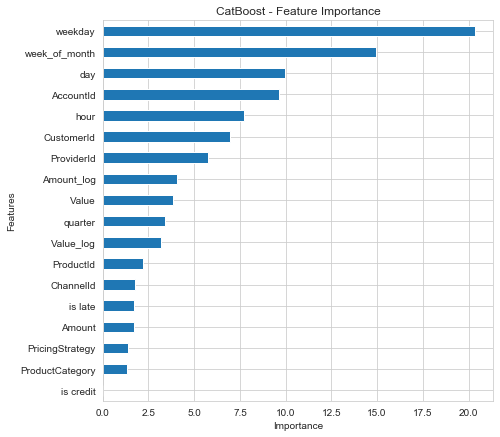

In [121]:
fea_imp = pd.DataFrame({'imp':clf_best_cb.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False])
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(7, 7), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')

In [122]:
clf_best_cb=CatBoostClassifier(iterations=194,learning_rate=0.1,depth=5,verbose=100,random_seed=12,eval_metric='F1')

clf_best_cb.fit(X,y,cat_features=[0,2,3,4,5,6,7,9,10,11,12,13])

0:	learn: 0.0000000	total: 221ms	remaining: 42.7s
100:	learn: 0.9684211	total: 1m 17s	remaining: 1m 11s
193:	learn: 0.9842932	total: 2m 35s	remaining: 0us


In [123]:
#pd.DataFrame(clf_best_cb.predict(test_data[X.columns])).to_csv('Xente benchmark new features 2.csv')

# Futher Feature Engineering

In [124]:
import featuretools as ft

In [125]:
# creating and entity set 'es'
es = ft.EntitySet(id = 'Xente')

# adding a dataframe 
es.entity_from_dataframe(entity_id = 'Data', dataframe = data.drop(['BatchId','FraudResult','SubscriptionId'],axis=1)
                         , index = 'TransactionId')

Entityset: Xente
  Entities:
    Data [Rows: 140681, Columns: 21]
  Relationships:
    No relationships

In [126]:
es.normalize_entity(base_entity_id='Data', new_entity_id='Account', index = 'AccountId', 
additional_variables = ['CustomerId','ProductCategory','ChannelId','Amount','Value'])

Entityset: Xente
  Entities:
    Data [Rows: 140681, Columns: 16]
    Account [Rows: 4841, Columns: 6]
  Relationships:
    Data.AccountId -> Account.AccountId

In [127]:
feature_matrix, feature_names = ft.dfs(entityset=es, target_entity = 'Data', max_depth = 4, verbose = 1, n_jobs = 1)

Built 84 features
Elapsed: 07:07 | Remaining: 00:00 | Progress: 100%|██████████████████████████████████████████| Calculated: 11/11 chunks


In [128]:
feature_matrix = feature_matrix.reindex(index=data['TransactionId'])
feature_matrix = feature_matrix.reset_index()

In [129]:
fe=[col for col in feature_matrix.columns if feature_matrix[col].nunique()>1]

In [130]:
dataset=feature_matrix[fe]

# Modelling

## Dataset Preparation

In [131]:
train_data=dataset[dataset['data']=='train']
test_data=dataset[dataset['data']!='train']

In [132]:
print(train_data.shape,train.shape)

(95662, 85) (95662, 17)


In [133]:
print(test_data.shape,test.shape)

(45019, 85) (45019, 16)


In [134]:
[col for col in train_data.columns if train_data[col].nunique()==1]

['data']

In [135]:
train_data.drop('data',axis=1,inplace=True)
test_data.drop('data',axis=1,inplace=True)

In [136]:
dataset.nunique().sort_values()

Account.MODE(Data.YEAR(TransactionStartTime))         2
Account.NUM_UNIQUE(Data.data)                         2
Account.MAX(Data.quarter)                             2
YEAR(TransactionStartTime)                            2
data                                                  2
                                                  ...  
Account.STD(Data.Amount_log)                       2607
Account.STD(Data.Value_log)                        2638
Account.CustomerId                                 4835
AccountId                                          4841
TransactionId                                    140681
Length: 85, dtype: int64

In [137]:
cat_co = [col for col in dataset.columns if dataset[col].dtypes=='object' and col not in
         ['data','TransactionId','BatchId','SubscriptionId','Account.CustomerId','AccountId']]

In [138]:
cat_co

['ProductId',
 'ProviderId',
 'weekday',
 'Account.ProductCategory',
 'Account.ChannelId',
 'Account.MODE(Data.ProductId)',
 'Account.MODE(Data.ProviderId)',
 'Account.MODE(Data.data)',
 'Account.MODE(Data.weekday)']

In [139]:
X=train_data.drop(['TransactionId','Account.CustomerId','AccountId'],axis=1)
y=data[data['data']=='train']['FraudResult']

In [140]:
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-(50000/X.shape[0])), random_state=42)

In [141]:
encoder_catboost = ce.cat_boost.CatBoostEncoder(cols=cat_co)
X_train_catboost=encoder_catboost.fit_transform(X_train,y_train)
X_test_catboost=encoder_catboost.transform(X_test)

In [142]:
clf_best_cb=CatBoostClassifier(iterations=2000,learning_rate=0.1,depth=5,verbose=100,
                     use_best_model=True,random_seed=12,eval_metric='F1', early_stopping_rounds=100)

clf_best_cb.fit(X_train_catboost,y_train,eval_set=(X_test_catboost,y_test))

0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 130ms	remaining: 4m 20s
100:	learn: 0.9948187	test: 0.9137056	best: 0.9137056 (65)	total: 12.6s	remaining: 3m 56s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9137055838
bestIteration = 65

Shrink model to first 66 iterations.


In [143]:
X_catboost=encoder_catboost.fit_transform(X,y)

In [144]:
clf_best_cb=CatBoostClassifier(iterations=66,learning_rate=0.1,depth=5,verbose=100,
                     random_seed=12,eval_metric='F1')

clf_best_cb.fit(X_catboost,y)

0:	learn: 0.0103093	total: 195ms	remaining: 12.7s
65:	learn: 0.9736842	total: 11.8s	remaining: 0us


Text(0.5, 0, 'Importance')

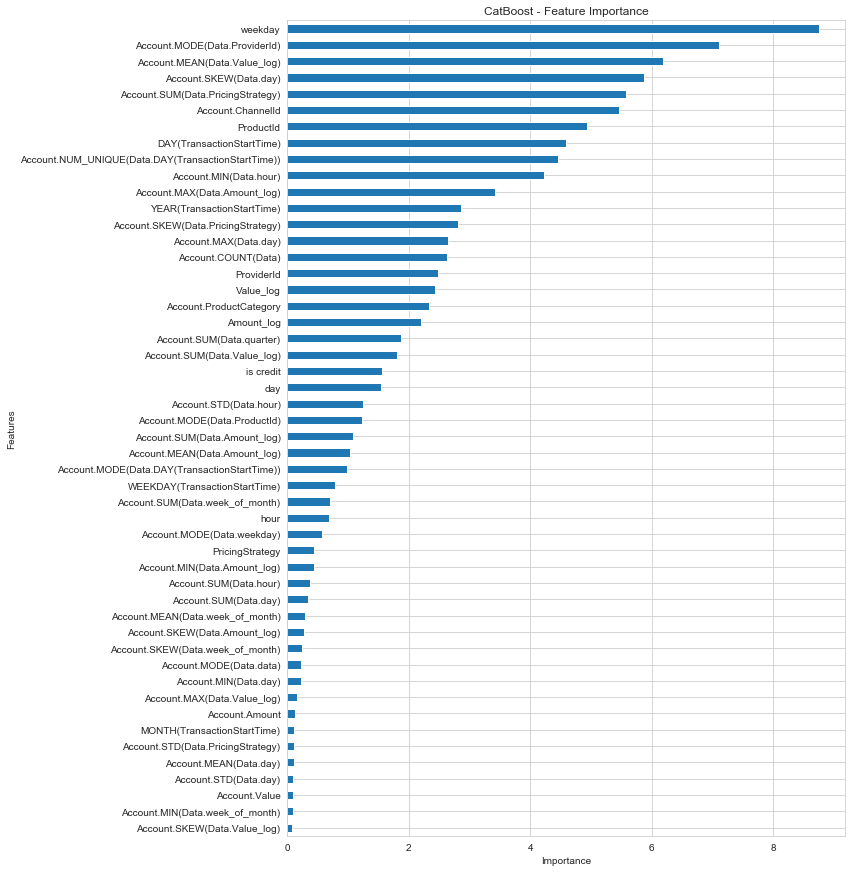

In [145]:
fea_imp = pd.DataFrame({'imp': clf_best_cb.feature_importances_, 'col': X_train_catboost.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-50:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 15), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')

In [146]:
from xgboost import XGBClassifier

In [147]:
xg=XGBClassifier(max_depth=7,learning_rate=0.1, n_estimators=1000, verbosity=1, random_state=0)

In [148]:
xg.fit(X_train_catboost, y_train,eval_set=[(X_test_catboost, y_test)], eval_metric='aucpr',
       early_stopping_rounds=50, verbose=True)

[0]	validation_0-aucpr:0.816013
Will train until validation_0-aucpr hasn't improved in 50 rounds.
[1]	validation_0-aucpr:0.827904
[2]	validation_0-aucpr:0.852799
[3]	validation_0-aucpr:0.917796
[4]	validation_0-aucpr:0.923409
[5]	validation_0-aucpr:0.924045
[6]	validation_0-aucpr:0.927553
[7]	validation_0-aucpr:0.92684
[8]	validation_0-aucpr:0.924832
[9]	validation_0-aucpr:0.918396
[10]	validation_0-aucpr:0.91314
[11]	validation_0-aucpr:0.91027
[12]	validation_0-aucpr:0.91
[13]	validation_0-aucpr:0.920404
[14]	validation_0-aucpr:0.933597
[15]	validation_0-aucpr:0.930089
[16]	validation_0-aucpr:0.927683
[17]	validation_0-aucpr:0.933259
[18]	validation_0-aucpr:0.931094
[19]	validation_0-aucpr:0.932064
[20]	validation_0-aucpr:0.928788
[21]	validation_0-aucpr:0.926472
[22]	validation_0-aucpr:0.931866
[23]	validation_0-aucpr:0.929537
[24]	validation_0-aucpr:0.926097
[25]	validation_0-aucpr:0.924725
[26]	validation_0-aucpr:0.929353
[27]	validation_0-aucpr:0.930304
[28]	validation_0-aucpr:0.9

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [149]:
from sklearn.metrics import f1_score
f1_score(y_test,xg.predict(X_test_catboost))

0.9090909090909091

Text(0.5, 0, 'Importance')

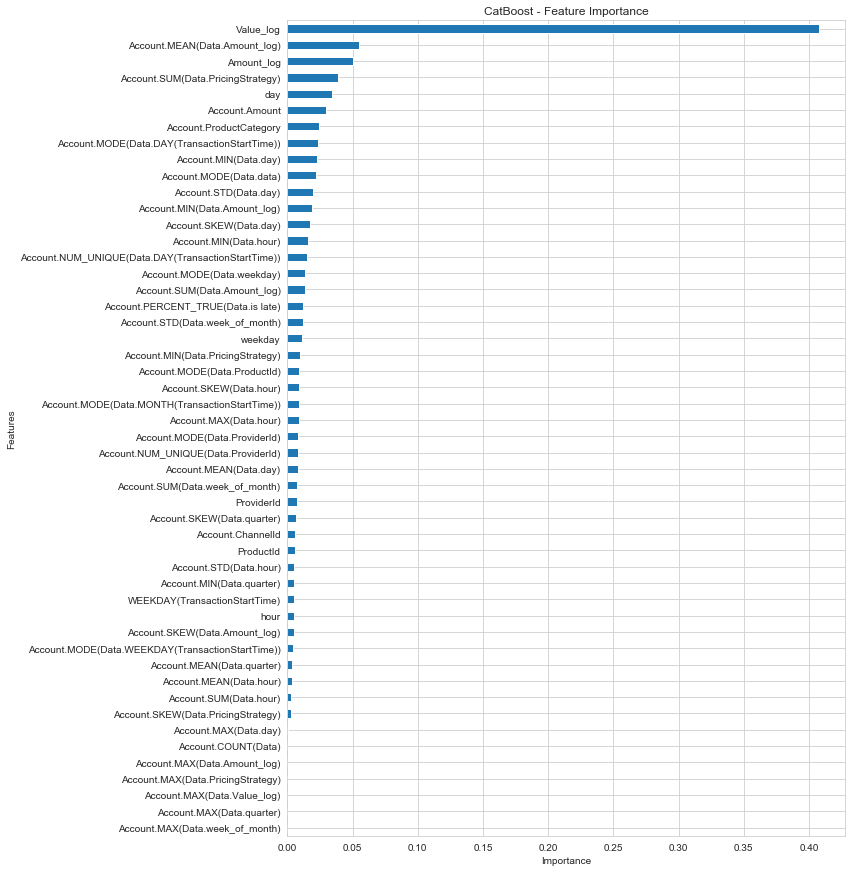

In [150]:
fea_imp = pd.DataFrame({'imp': xg.feature_importances_, 'col': X_train_catboost.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-50:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 15), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')

In [151]:
xg_best=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
       n_estimators=14, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [152]:
xg_best.fit(X_catboost,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=14, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [153]:
xx=encoder_catboost.transform(test_data.drop(['TransactionId','Account.CustomerId','AccountId'],axis=1))

In [154]:
#pd.DataFrame(xg_best.predict(xx)).to_csv('XGB 111.csv')
#pd.DataFrame(xg_best.predict(xx)).to_csv('cb.csv')

In [155]:
import shap
shap.initjs()

In [156]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(xg_best)
shap_values = explainer.shap_values(X_catboost)

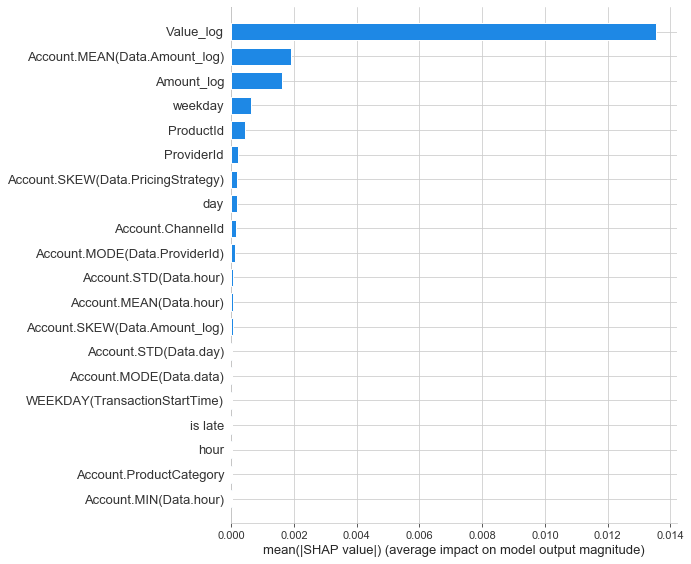

In [157]:
shap.summary_plot(shap_values, X_catboost, plot_type="bar")

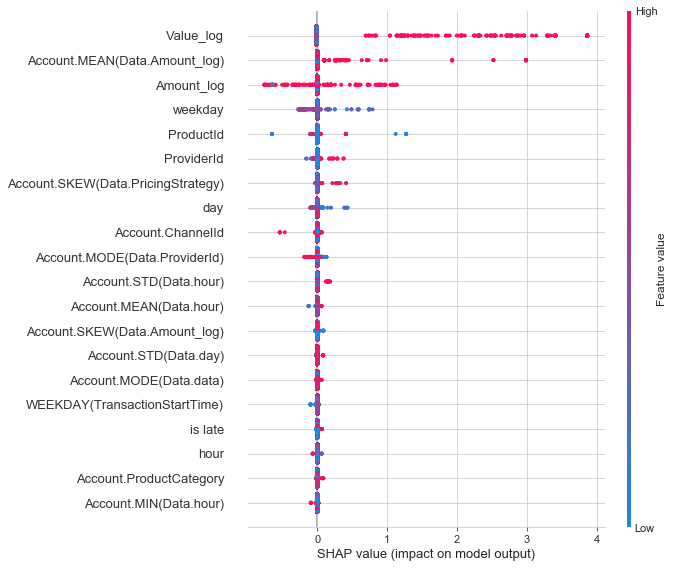

In [158]:
shap.summary_plot(shap_values, X_catboost)

In [159]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(clf_best_cb)
shap_values = explainer.shap_values(X_catboost)

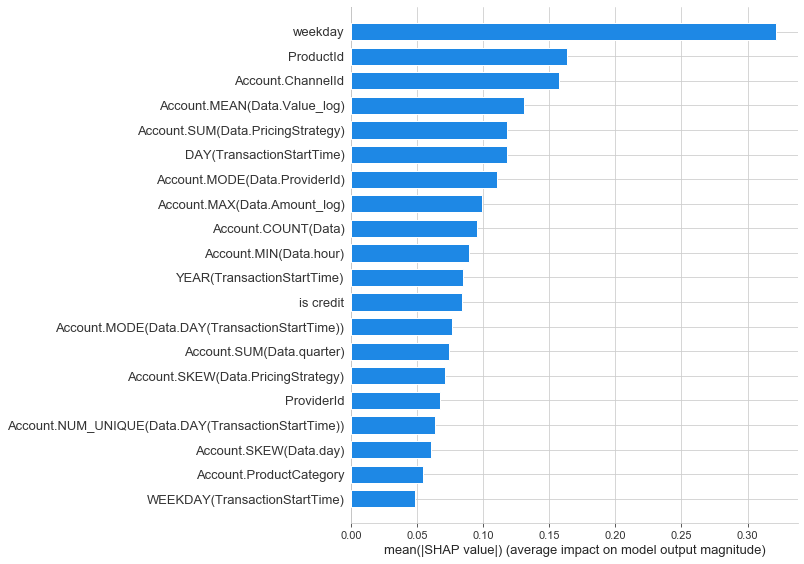

In [160]:
shap.summary_plot(shap_values, X_catboost, plot_type="bar")

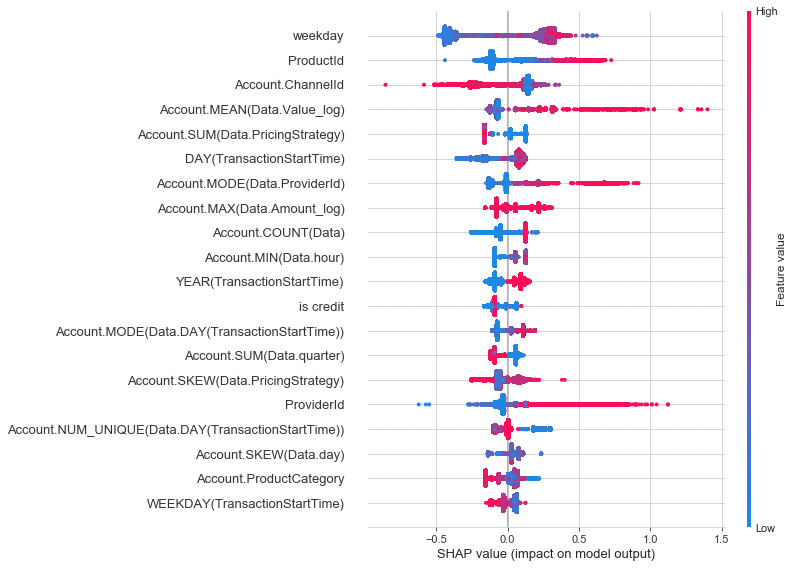

In [161]:
shap.summary_plot(shap_values, X_catboost)

In [162]:
data_2=pd.read_csv('Customer Profile.csv',parse_dates=['TransactionStartTime'])

In [163]:
data_2=data_2[['TransactionId','TimeBetweenTransaction', 'AmountBetweenTransaction',
       'PreviousTransactionBetweenHour', 'NumberOfTransactionWithinHour',
       'AveAmtWithinPeriod']]

In [164]:
dataset_2=dataset.merge(data_2,on='TransactionId')

In [165]:
train_data=dataset_2[dataset_2['data']=='train']
test_data=dataset_2[dataset_2['data']!='train']

In [166]:
train_data.drop('data',axis=1,inplace=True)
test_data.drop('data',axis=1,inplace=True)

In [167]:
cat_co = [col for col in dataset_2.columns if dataset_2[col].dtypes=='object' and col not in
         ['data','TransactionId','BatchId','SubscriptionId','Account.CustomerId','AccountId']]

In [168]:
cat_co

['ProductId',
 'ProviderId',
 'weekday',
 'Account.ProductCategory',
 'Account.ChannelId',
 'Account.MODE(Data.ProductId)',
 'Account.MODE(Data.ProviderId)',
 'Account.MODE(Data.data)',
 'Account.MODE(Data.weekday)']

In [169]:
X=train_data.drop(['TransactionId','Account.CustomerId','AccountId'],axis=1)
y=data[data['data']=='train']['FraudResult']

from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-(50000/X.shape[0])), random_state=42)

In [170]:
encoder_catboost = ce.cat_boost.CatBoostEncoder(cols=cat_co)
X_train_catboost=encoder_catboost.fit_transform(X_train,y_train)
X_test_catboost=encoder_catboost.transform(X_test)

In [171]:
X_catboost=encoder_catboost.fit_transform(X,y)

In [172]:
xg=XGBClassifier(max_depth=7,learning_rate=0.1, n_estimators=1000, verbosity=1, random_state=0)

In [173]:
xg.fit(X_train_catboost, y_train,eval_set=[(X_test_catboost, y_test)], eval_metric='aucpr',
       early_stopping_rounds=50, verbose=True)

[0]	validation_0-aucpr:0.812451
Will train until validation_0-aucpr hasn't improved in 50 rounds.
[1]	validation_0-aucpr:0.82679
[2]	validation_0-aucpr:0.849184
[3]	validation_0-aucpr:0.917252
[4]	validation_0-aucpr:0.917211
[5]	validation_0-aucpr:0.922435
[6]	validation_0-aucpr:0.922758
[7]	validation_0-aucpr:0.92709
[8]	validation_0-aucpr:0.925747
[9]	validation_0-aucpr:0.930229
[10]	validation_0-aucpr:0.934025
[11]	validation_0-aucpr:0.933733
[12]	validation_0-aucpr:0.930489
[13]	validation_0-aucpr:0.936808
[14]	validation_0-aucpr:0.933989
[15]	validation_0-aucpr:0.937932
[16]	validation_0-aucpr:0.935501
[17]	validation_0-aucpr:0.940989
[18]	validation_0-aucpr:0.938554
[19]	validation_0-aucpr:0.943897
[20]	validation_0-aucpr:0.945542
[21]	validation_0-aucpr:0.943664
[22]	validation_0-aucpr:0.941059
[23]	validation_0-aucpr:0.941819
[24]	validation_0-aucpr:0.94236
[25]	validation_0-aucpr:0.943594
[26]	validation_0-aucpr:0.943023
[27]	validation_0-aucpr:0.943693
[28]	validation_0-aucpr

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [174]:
from sklearn.metrics import f1_score
f1_score(y_test,xg.predict(X_test_catboost))

0.91

In [175]:
xx=encoder_catboost.transform(test_data.drop(['TransactionId','Account.CustomerId','AccountId'],axis=1))

In [176]:
xg_best=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [177]:
xg_best.fit(X_catboost,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [178]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(xg_best)
shap_values = explainer.shap_values(X_catboost)

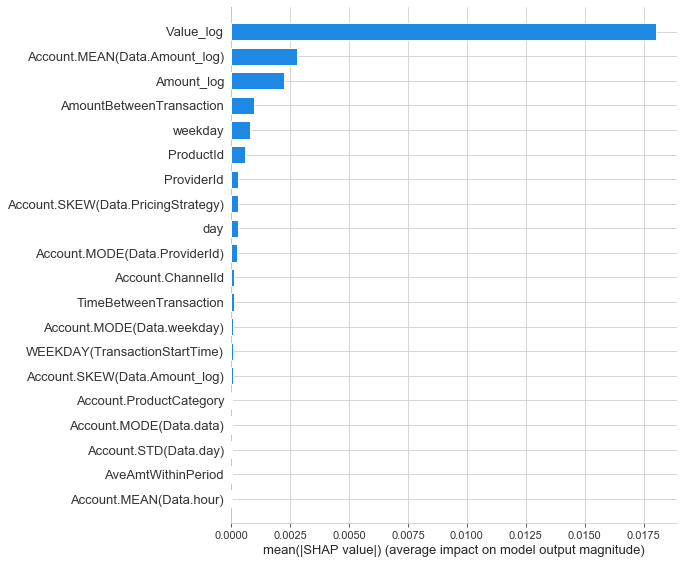

In [179]:
shap.summary_plot(shap_values, X_catboost,plot_type='bar')

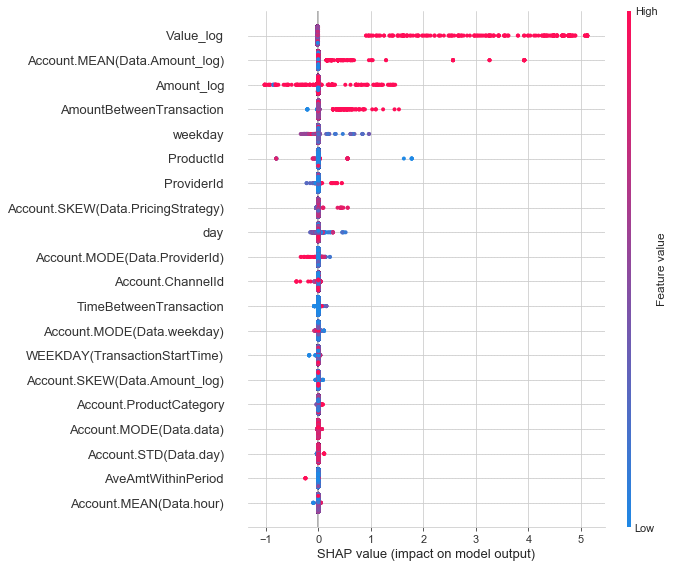

In [180]:
shap.summary_plot(shap_values, X_catboost)

Text(0.5, 0, 'Importance')

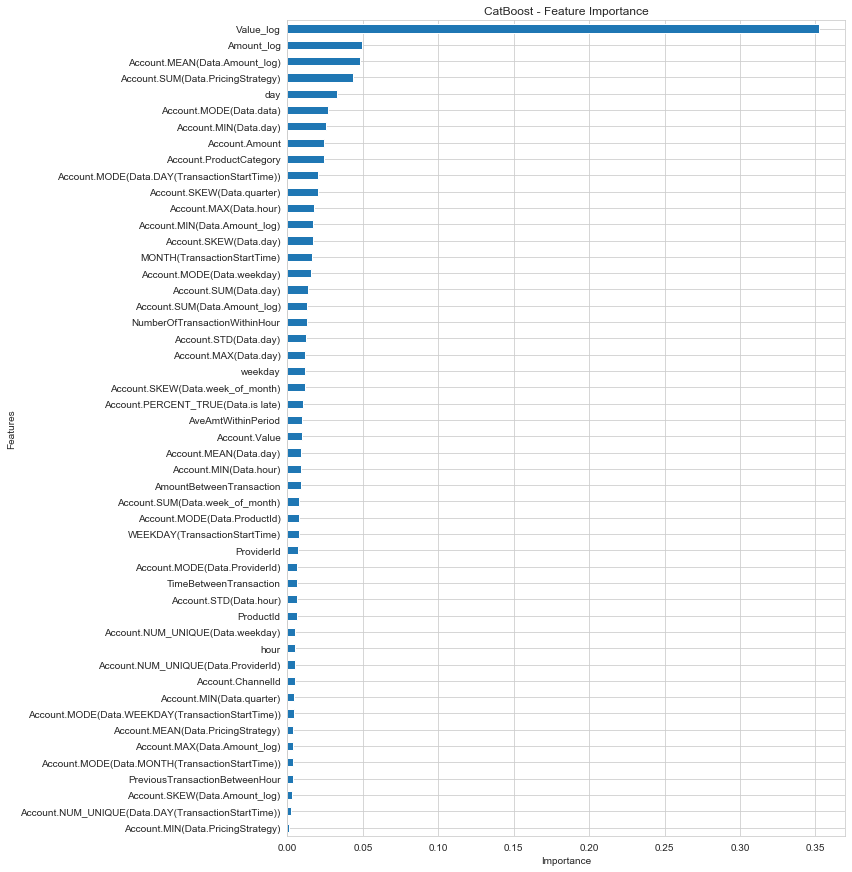

In [181]:
fea_imp = pd.DataFrame({'imp': xg.feature_importances_, 'col': X_train_catboost.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-50:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 15), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')

In [182]:
#pd.DataFrame(xg_best.predict(xx)).to_csv('XGB IV.csv')

In [228]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [185]:
dataset.to_csv('dataset.csv')

In [186]:
train_data=dataset[dataset['data']=='train']
test_data=dataset[dataset['data']!='train']

In [187]:
train_data.drop('data',axis=1,inplace=True)
test_data.drop('data',axis=1,inplace=True)

In [188]:
cat_co = [col for col in dataset.columns if dataset[col].dtypes=='object' and col not in
         ['data','TransactionId','BatchId','SubscriptionId','Account.CustomerId','AccountId']]

In [ ]:
X=train_data.drop(['TransactionId','Account.CustomerId','AccountId'],axis=1)
y=data[data['data']=='train']['FraudResult']

from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-(50000/X.shape[0])), random_state=42111)

encoder_catboost = ce.cat_boost.CatBoostEncoder(cols=cat_co)
X_train_catboost=encoder_catboost.fit_transform(X_train,y_train)
X_test_catboost=encoder_catboost.transform(X_test)

In [ ]:
X_test_catboost.isnull().sum().sum()

In [230]:
sc=RobustScaler()

In [231]:
X_train_catboost=sc.fit_transform(X_train_catboost,y_train)
X_test_catboost=sc.transform(X_test_catboost)

In [232]:
from sklearn.decomposition import PCA

In [233]:
pca=PCA()

In [234]:
pca.fit(X_train_catboost,y_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

[<matplotlib.lines.Line2D at 0x19ab923b470>]

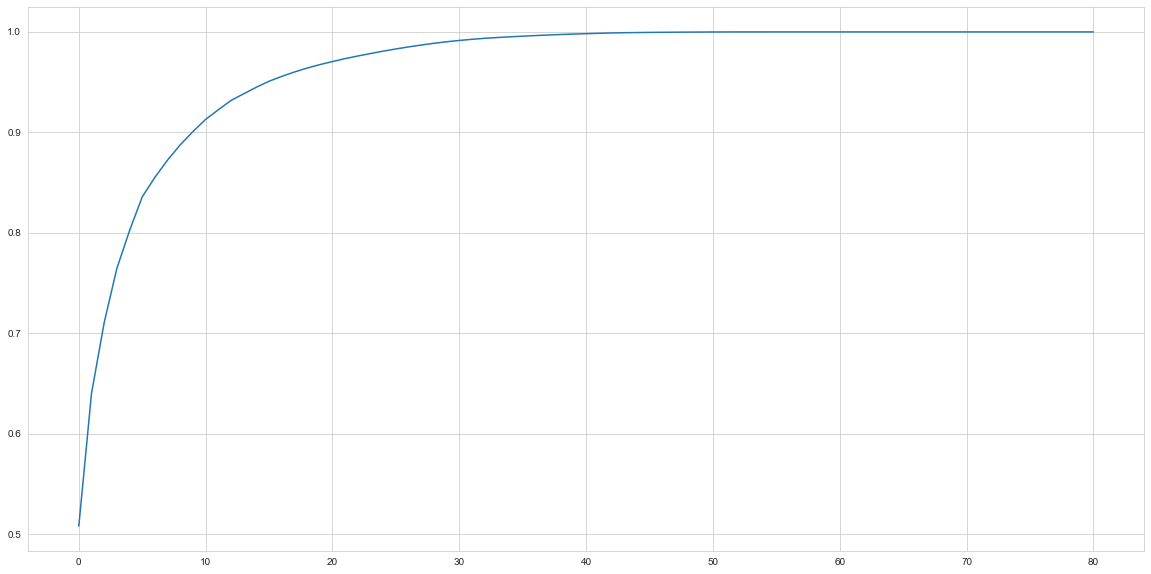

In [235]:
plt.figure(figsize=(20,10))
plt.plot(pca.explained_variance_ratio_.cumsum())

In [236]:
pca=PCA(n_components=35)

In [237]:
X_train_catboost=pca.fit_transform(X_train_catboost,y_train)
X_test_catboost=pca.transform(X_test_catboost)

In [238]:
xg=XGBClassifier(max_depth=7,learning_rate=0.1, n_estimators=1000, verbosity=1, random_state=0)

xg.fit(X_train_catboost, y_train,eval_set=[(X_test_catboost, y_test)], eval_metric='aucpr',
       early_stopping_rounds=50, verbose=True)

[0]	validation_0-aucpr:0.031888
Will train until validation_0-aucpr hasn't improved in 50 rounds.
[1]	validation_0-aucpr:0.034062
[2]	validation_0-aucpr:0.039786
[3]	validation_0-aucpr:0.042397
[4]	validation_0-aucpr:0.042577
[5]	validation_0-aucpr:0.038662
[6]	validation_0-aucpr:0.125101
[7]	validation_0-aucpr:0.155282
[8]	validation_0-aucpr:0.174797
[9]	validation_0-aucpr:0.21292
[10]	validation_0-aucpr:0.176537
[11]	validation_0-aucpr:0.219696
[12]	validation_0-aucpr:0.203325
[13]	validation_0-aucpr:0.219455
[14]	validation_0-aucpr:0.237564
[15]	validation_0-aucpr:0.238149
[16]	validation_0-aucpr:0.23732
[17]	validation_0-aucpr:0.247169
[18]	validation_0-aucpr:0.280444
[19]	validation_0-aucpr:0.284566
[20]	validation_0-aucpr:0.278537
[21]	validation_0-aucpr:0.28296
[22]	validation_0-aucpr:0.281337
[23]	validation_0-aucpr:0.27573
[24]	validation_0-aucpr:0.277869
[25]	validation_0-aucpr:0.297233
[26]	validation_0-aucpr:0.288489
[27]	validation_0-aucpr:0.289142
[28]	validation_0-aucpr:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [239]:
f1_score(y_test,xg.predict(X_test_catboost))

0.6056338028169014